# Supervised Learning - Classification Project: INN Hotels

## 1. Problem Statement

### 1.1. Business Context

A significant number of hotel bookings are called-off due to **cancellations or no-shows**. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings **impact** a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

### 1.3. Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to:
1. find which **factors** have a high influence on booking cancellations,
2. build a **predictive model** that can predict which booking is going to be canceled in advance,
3. and help in **formulating profitable policies** for cancellations and refunds.

### 1.4. Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## 2. Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 36.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4de

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
# Mounting Google Drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4 Supervised Learning Classification/Week 3/INNHotelsGroup.csv')

In [ ]:
# Creating a copy of the data to avoid accidental data loss and safely test changes without affecting the original dataset
data = df.copy()

## 3. Data Overview

- In this section, we aim to investigate the structure, format and sanity of the data (e.g., missing or duplicated values).

In [ ]:
data.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   
5                                     0           115.00000   
6                                     0           107.55000   
7                                     0           105.61000   
8                                     0            96.90000   
9                                     0           133.44000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

In [ ]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [ ]:
data.shape

(36275, 19)

- There are 36, 275 rows and 19 columms in the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- There are 5 columns with object data type: `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, `booking_status` (**target variable**).
- Only `avg_price_per_room` has a float data type.
- The rest of the variables are integers.



In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

- There are no missing or duplicated values, so less data cleaning and pre-processing is expected.

Since all the values in `Booking_ID` column are unique and **don't contain any useful information for prediction**, we are **excluding** it from our model.

In [ ]:
data = data.drop(["Booking_ID"], axis = 1) ## Complete the code to drop the Booking_ID column from the dataframe

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## 4. Exploratory Data Analysis (EDA)

- This section aims to explore and understand the data (i.e, the predictors and target variables) better before building a model with it.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### 4.1. Statistical Summary of the Data

In [ ]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

**Observations**
- Most bookings are for 2 adults (mean ≈ 1.84), and no children (mean ≈ 0.11).
- Guests typically stay 2.2 weekdays and 0.8 weekend nights.
- Only 3% of bookings requested a parking space (mean ≈ 0.03).
- The average lead time is 85 days, but ranges from 0 to 443 days, suggesting high variability and some last-minute bookings.
- Very few are repeated guests (~2.6%), indicating most customers are first-time visitors.
- Cancellations and prior bookings are rare on average, but some users canceled up to 13 times or booked up to 58 times without canceling.
- Average price per room per day is €103, with a max of €540 — suggesting dynamic pricing.
- Most bookings had 0 special requests, but some had up to 5.
- All bookings appear to be for 2017 to 2018.
- Peak arrival is around July (mean ≈ 7.4).

In [ ]:
data.describe(include = 'object').T

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

**Observations**
- Most customers selected Meal Plan 1 (breakfast) ~77% of the bookings.
- Room_Type 1 dominates, with ~77% of reservations.
- Approximately 64% of bookings were booked online.
- Approximatelely 67% of bookings were Not Canceled, ~33% Canceled.

### 4.2. Univariate Analysis

In [ ]:
# Function to plot both a boxplot and histogram for a single numeric feature.
# Helps visualize the distribution, detect skewness, and identify outliers, with mean and median lines for reference.

def histogram_boxplot(data, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Plotting a boxplot and histogram for a single numeric feature.

    Parameters:
    - data: DataFrame containing the data.
    - feature: The column name of the feature to plot.
    - figsize: Tuple controlling the figure size.
    - kde: Choosing whether to overlay a kernel density estimate on the histogram.
    - bins: Setting the number of bins for the histogram (optional).
    """

    # Skipping if the feature is not numeric
    if not pd.api.types.is_numeric_dtype(data[feature]):
        print(f"Skipping non-numeric column: {feature}")
        return

    # Creating a figure with 2 subplots stacked vertically
    # Using the first for the boxplot, the second for the histogram; sharing the x-axis
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Defining two rows: one for the boxplot, one for the histogram
        sharex=True,  # Sharing the x-axis between both plots
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Assigning less vertical space to the boxplot
        figsize=figsize  # Setting the overall figure size
    )

    # Plotting the boxplot on the top subplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")

    # Plotting the histogram on the bottom subplot
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)

    # Adding a vertical line showing the mean of the feature
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")

    # Adding a vertical line showing the median of the feature
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    # Showing the legend for mean and median lines
    ax_hist.legend()

    # Adding a title at the top of the figure
    plt.suptitle(f"Histogram & Boxplot for '{feature}'", fontsize=16)

    # Adjusting layout to prevent overlap
    plt.tight_layout()

    # Displaying the final plot
    plt.show()

In [ ]:
# Function to automatically generate boxplot + histogram visualizations.

def auto_histogram_boxplot(data, features=None, **kwargs):
    """
    Runs histogram_boxplot for multiple features.

    features: list of column names to plot; if None, auto-selects numeric columns
    kwargs: passed to histogram_boxplot (e.g., figsize, kde, bins)

    Adds visual dividers between plots.
    """
    if features is None:
        features = data.select_dtypes(include='number').columns

    for feature in features:
        print("\n" + "=" * 160)
        print(f"    ")
        print("=" * 160 + "\n")
        histogram_boxplot(data, feature, **kwargs)


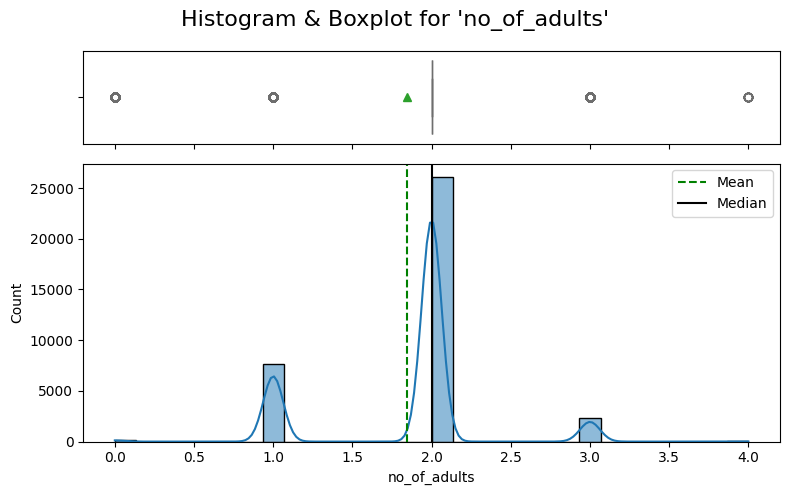

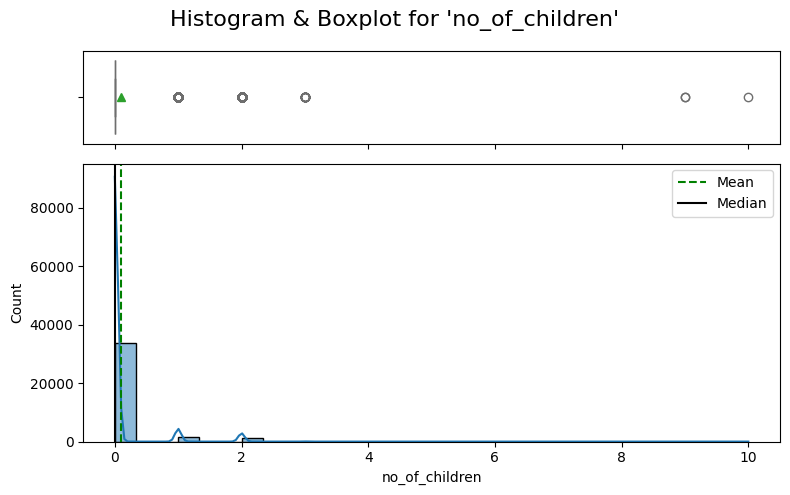

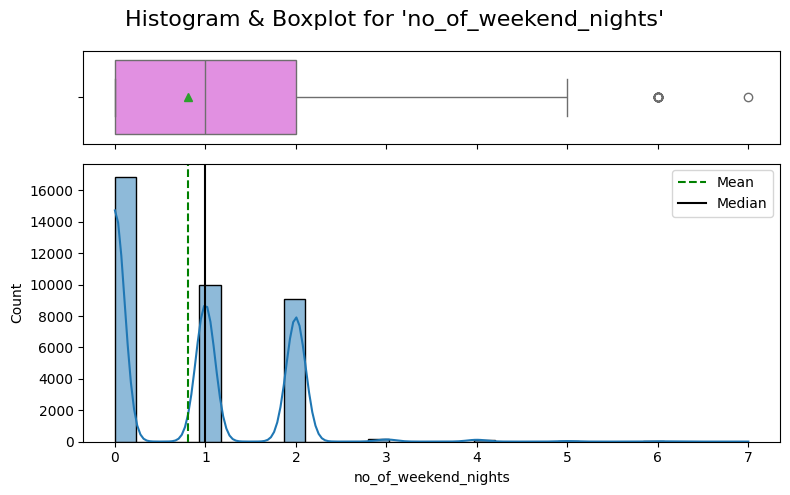

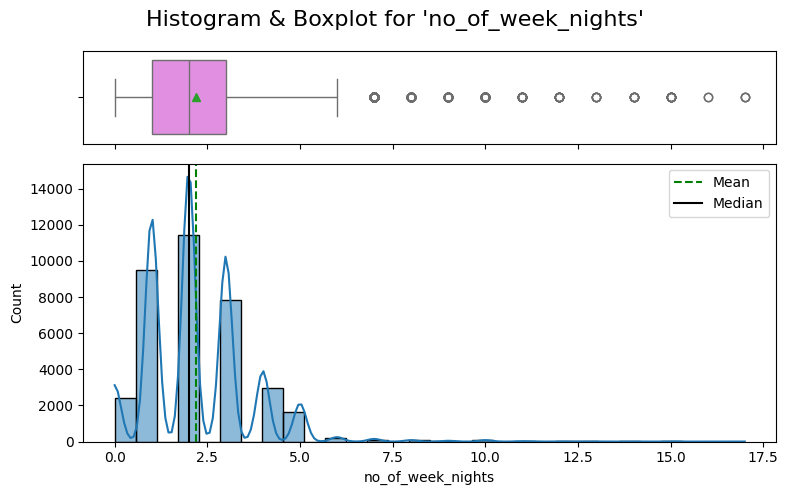

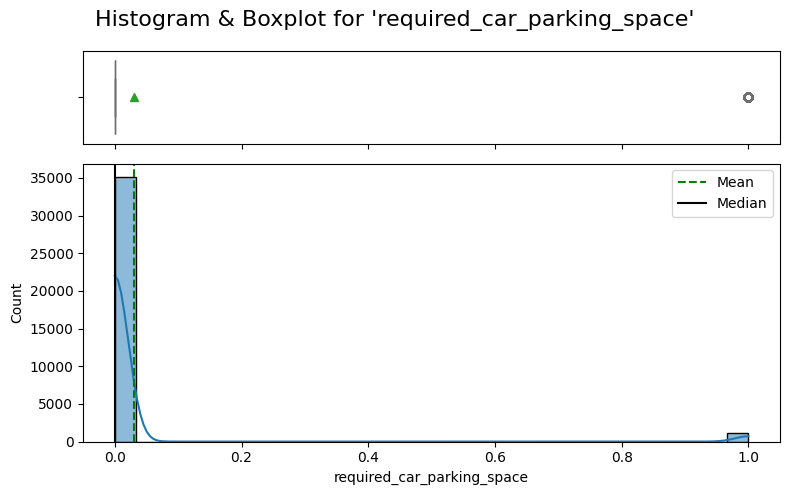

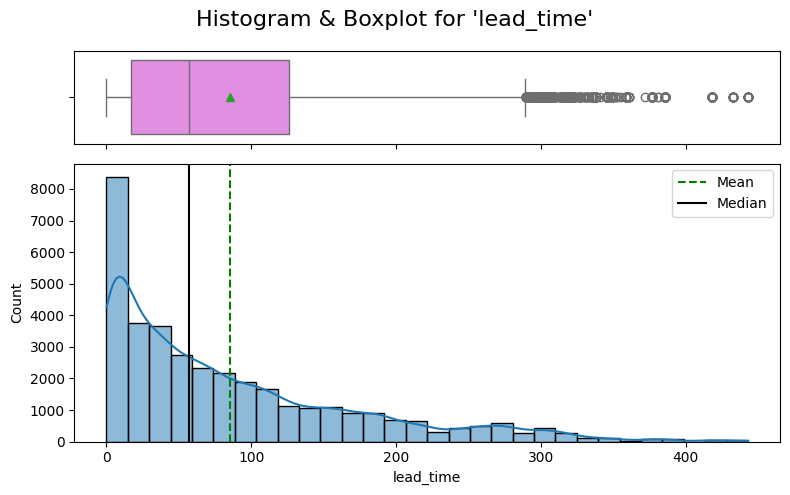

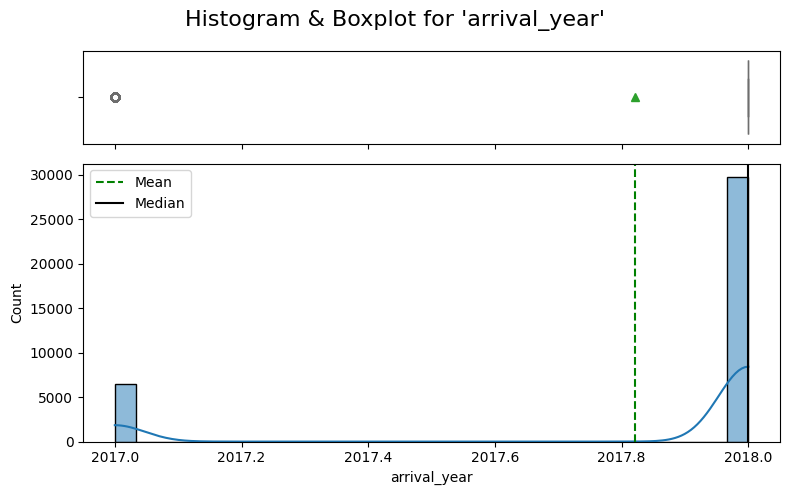

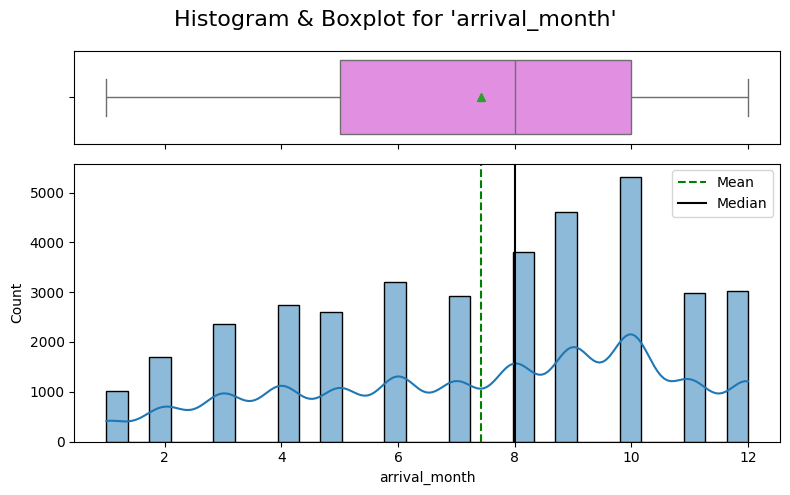

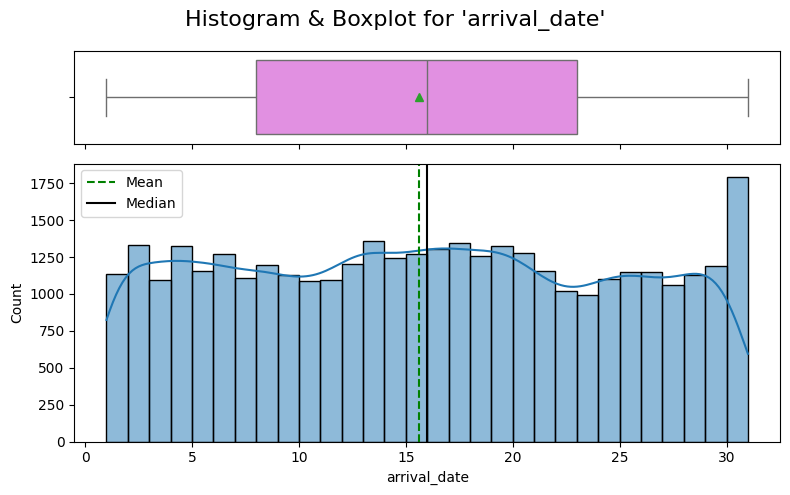

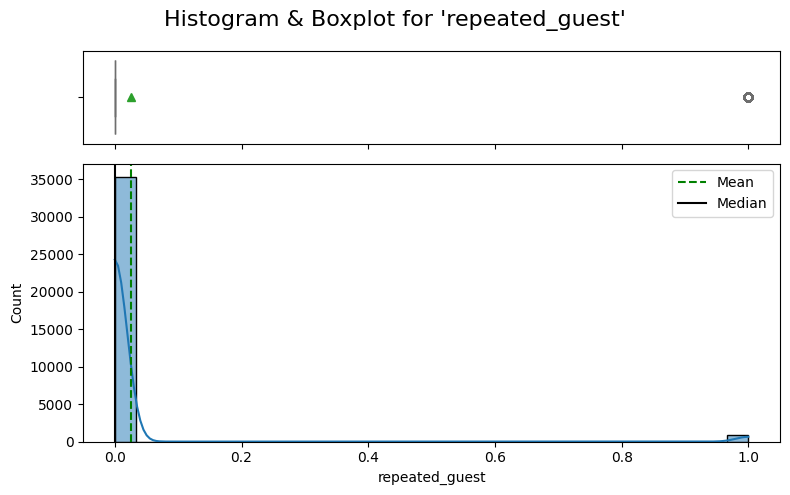

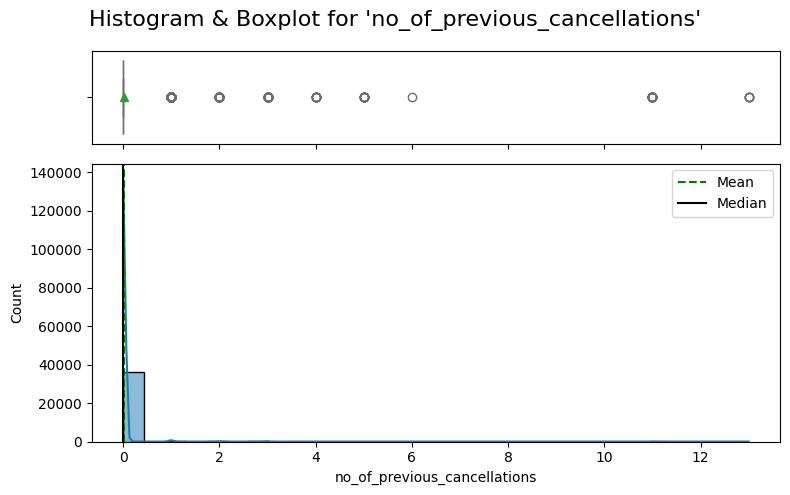

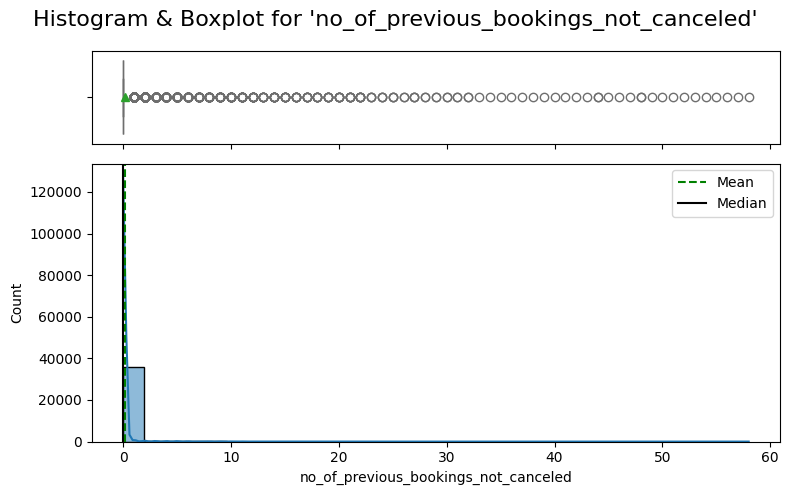

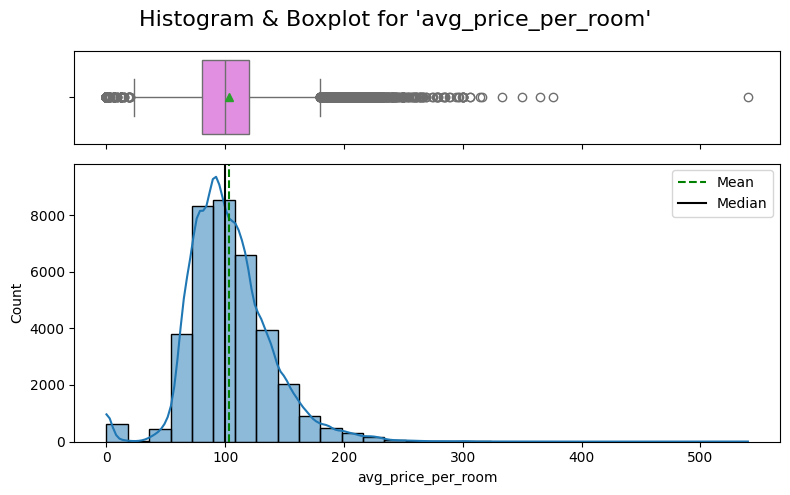

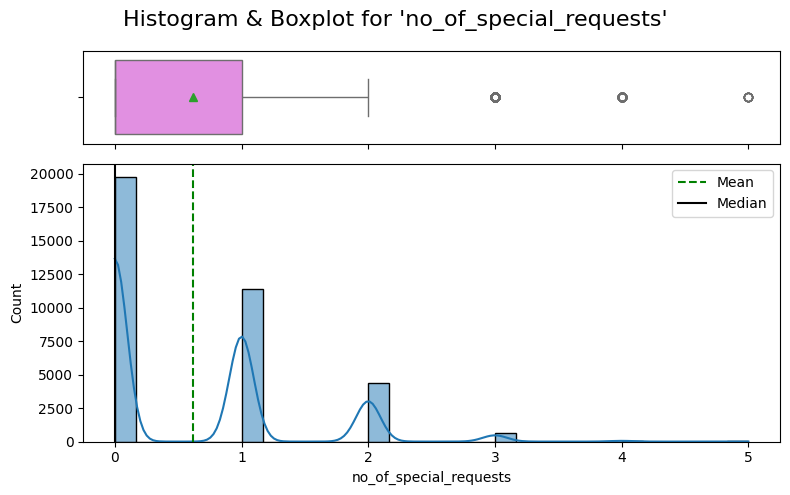

In [ ]:
auto_histogram_boxplot(data, kde=True, bins=30)

**Univariate Analysis: Additional Numerical Variables Observations**
- The histogram plots of the variables **confirm the observations we made from the statistical summary**. In addition, it provides more insights about the outliers and skewness of the variables.

- Most bookings are for 2 adults, with minor counts for 1 or 3. Distribution is slightly left-skewed with the mean below the median. **A few invalid 0s are observed and may require data cleaning**.

- The distribution of `arrival_year` is heavily right-skewed, with most **bookings concentrated in 2018**. This suggests that either the hotel's operations scaled up in 2018 or the dataset sampling is not balanced across years.

- Booking frequency is generally **uniform across the month**, with a small spike near the 31st, possibly due to promotional offers or month-end travel planning.

- Looking at `repeated_guest`, **most bookings are from first-time guests**, with repeat guests being very rare outliers. This highlights an opportunity for the hotel to improve **customer retention and rebooking incentives**.

**Question # 1. What are the busiest months in the hotel?**

Based on the `arrival_month distribution`, **October has the highest number of bookings**, followed by September and August, while January sees the fewest. The **median booking month is August**, indicating that most bookings occur in the second half of the year. Overall, the booking trend shows seasonal variation.

In [ ]:
# Function to create a barplot for a categorical feature, displaying either raw counts or percentages as labels on each bar.

def labeled_barplot(data, feature, perc=False, n=None, title=None):
    """
    Creating a barplot with counts or percentages labeled on top.

    Parameters:
    - data: the DataFrame
    - feature: the categorical column to plot
    - perc: setting True will display percentages instead of counts
    - n: limiting to top n most frequent categories
    """
    # Calculating total number of values for percentage calculation
    total = len(data[feature])

    # Counting the number of unique category levels
    count = data[feature].nunique()

    # Setting figure size based on number of categories (or top n)
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    # Rotating x-axis labels for readability and setting font size
    plt.xticks(rotation=90, fontsize=15)

    # Creating a barplot ordered by frequency
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    # Looping through each bar to annotate with count or percentage
    for p in ax.patches:
        if perc == True:
            # Calculating and formatting percentage label
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            # Using raw count as label
            label = p.get_height()

        # Calculating x and y positions for label placement
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        # Adding the label above the bar
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    # Adding a title to the barplot
    if title is None:
      plt.title(f"Barplot for '{feature}'", fontsize=16)
    else:
      plt.title(title, fontsize=16)


    # Displaying the plot
    plt.show()


In [ ]:
# Function to automatically generate labeled barplots for multiple categorical features in a dataset.
# Displays counts or percentages.

def auto_barplots(data, features=None, perc=True, n=None, titles=None):
    """
    Automating labeled barplot creation for multiple categorical features.

    Parameters:
    - data: the DataFrame
    - features: list of column names to plot; if None, selecting categorical columns automatically
    - perc: setting True will display percentages
    - n: limiting to top n categories
    """
    # Selecting categorical features if not provided
    if features is None:
        features = data.select_dtypes(include=["object", "category"]).columns

    # Looping through each feature and generating a plot
    for feature in features:
        # Printing a visual divider
        print("\n" + "=" * 180)
        print(" " * 4)
        print("=" * 180 + "\n")

        # Calling the labeled barplot function
        labeled_barplot(data, feature, perc=perc, n=n)


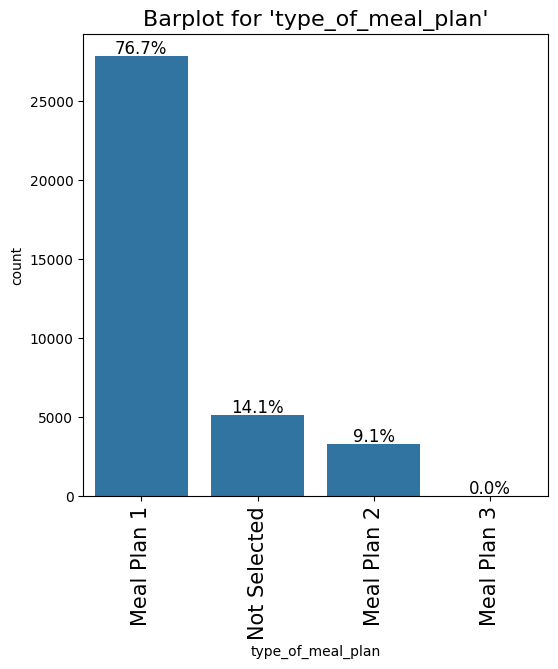

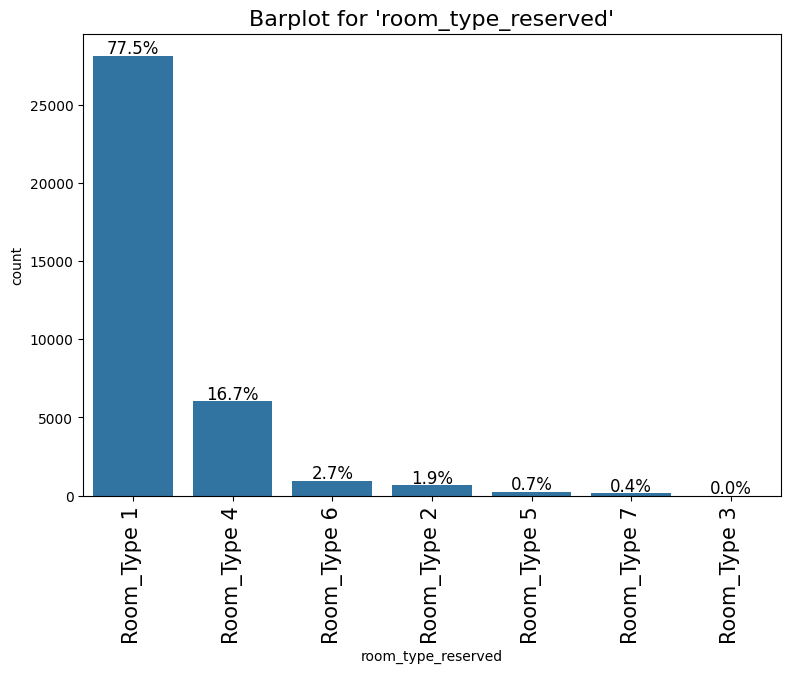

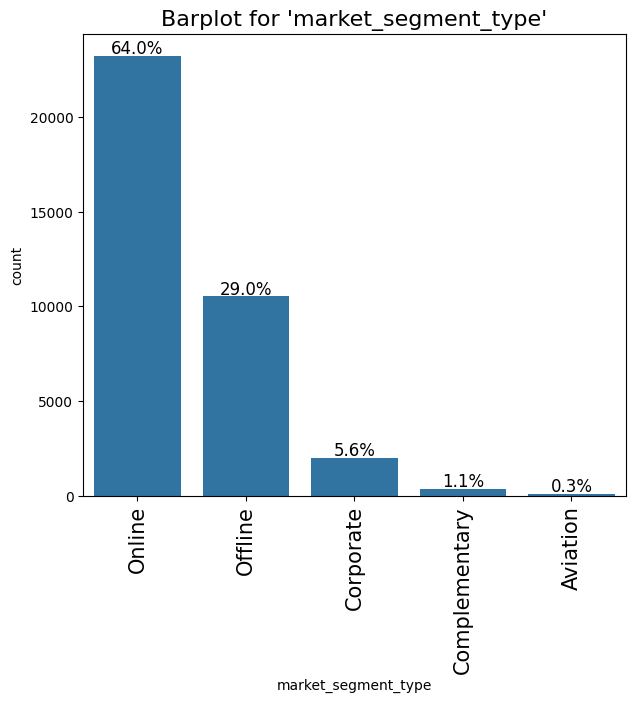

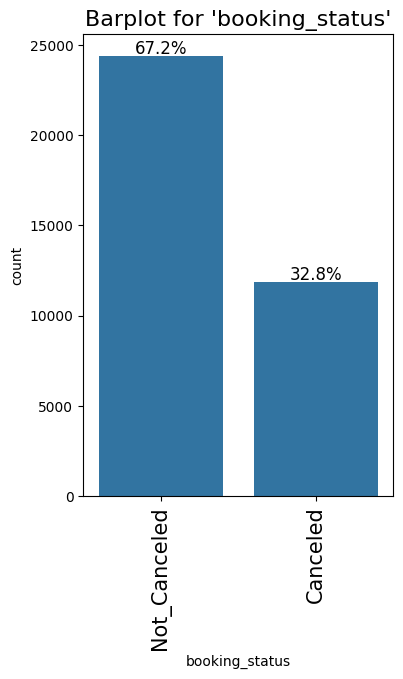

In [ ]:
auto_barplots(data)

**Univariate Analysis: Categorical Variables Observations**

- The vast majority of guests (76.7%) select `Meal Plan 1` (breakfast only). Fewer opt for `no plan` (14.1%) or `Meal Plan 2` (9.1%), while `Meal Plan 3` is almost unused.

- `Room_Type 1` dominates at 77.5%, followed by `Room_Type 4` (16.7%). Other room types are rarely selected, with `Room_Type 3` virtually unused.

**Question # 2. Which market segment do most of the guests come from?**

- Most bookings are made through the `Online market segment` (64.0%), followed by `Offline` (29.0%). The remaining segments (Corporate, Complementary, Aviation) together make up less than 7%.

**Question # 4. What percentage of bookings are canceled?**

Based on the distribution of `booking_status` (target variable), **32.8% of bookings are canceled**, while **67.2% are not**. This high cancellation rate creates challenges for hotel operations, including unpredictable staffing, lost revenue from empty rooms, and added costs to re-market them. Strategies like dynamic pricing or overbooking may help, but they also carry risks if not managed carefully.



### 4.3. Bivariate Analysis

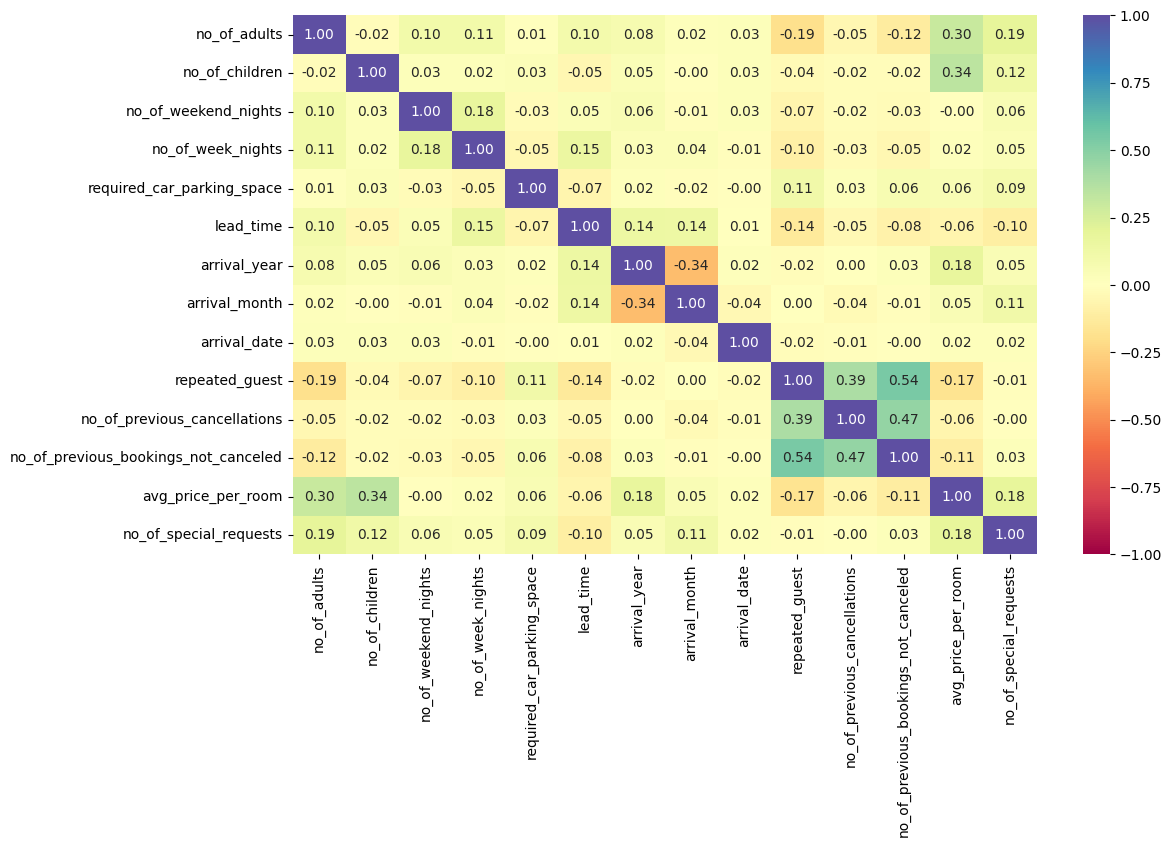

In [ ]:
# Plotting a heatmap without the target variable (since it's currently categorical)
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**
- **No strong multicollinearity**: Most variable pairs have correlations close to 0, suggesting features are fairly independent.

- **Moderate correlations**:

  * `avg_price_per_room` shows moderate positive correlation with:

    * `no_of_adults` (0.30)
    * `no_of_children` (0.34)

    * This suggests larger groups tend to book more expensive rooms.

  * `no_of_previous_bookings_not_canceled` is moderately correlated with:

    * `repeated_guest` (0.54)
    * `no_of_previous_cancellations` (0.47)

    * These make sense as repeated guests likely have more past bookings (canceled or not).

- **Slight negative correlation**:

  * `repeated_guest` has a small negative correlation with:

    * `no_of_adults` (−0.19)
    * `avg_price_per_room` (−0.17)
    * Possibly indicating repeat guests tend to book smaller or cheaper reservations.

- **Arrival year and month** are negatively correlated (−0.34), likely because 2017 has more early-year bookings while 2018 has more later months.


In [ ]:
# Function to plot distributions with respect to target variable

def distribution_plot_wrt_target(data, predictor, target):

    # Creating a 2x2 grid of subplots for visualization
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Getting the unique classes of the target variable (assuming binary classification)
    target_uniq = data[target].unique()

    # Plotting histogram with KDE for the first target class
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],  # Filtering data for class 0
        x=predictor,                               # Plotting predictor variable
        kde=True,                                  # Overlaying density curve
        ax=axs[0, 0],                               # Using top-left subplot
        color="teal",
        stat="density"                             # Normalizing to show density
    )

    # Plotting histogram with KDE for the second target class
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],  # Filtering data for class 1
        x=predictor,
        kde=True,
        ax=axs[0, 1],                               # Using top-right subplot
        color="orange",
        stat="density"
    )

    # Plotting a boxplot of predictor grouped by target class
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,                                   # Grouping by target
        y=predictor,
        ax=axs[1, 0]                                # Using bottom-left subplot
    )

    # Plotting a boxplot without outliers to reduce skew from extreme values
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],                                # Using bottom-right subplot
        showfliers=False                             # Hiding outliers
    )

    # Adjusting subplot spacing to avoid overlap
    plt.tight_layout()

    # Displaying the combined plots
    plt.show()

In [ ]:
# Function to print the category counts and plotting a stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Parameters:
    - data: DataFrame containing the data
    - predictor: Categorical independent variable
    - target: Categorical target variable
    """

    # Counting the number of unique categories in the predictor variable
    count = data[predictor].nunique()

    # Getting the least frequent class in the target to use for sorting
    sorter = data[target].value_counts().index[-1]

    # Creating a contingency table with counts, adding row/column totals, and sorting by target class frequency
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    # Printing the raw count table
    print(tab1)
    print("-" * 120)

    # Creating a normalized (percentage) version of the table, sorting by the same target class
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plotting the normalized table as a stacked bar chart
    # Assign the Axes object returned by plot() to ax
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    # Add percentage labels to the stacked bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width/2., y + height/2., '{:.1%}'.format(height),
                    ha='center', va='center', color='white')

    # Customizing the legend: positioning it outside the main plot
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

    # Displaying the plot
    plt.show()

#### Market Segment Type vs Average Price Per Room

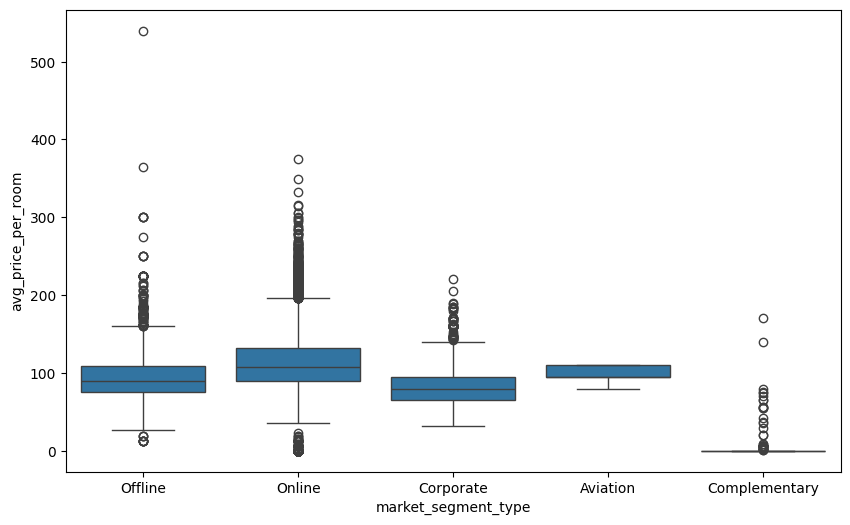

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

**Question # 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

- `Online and Offline Segments`:

  - These two segments have the widest price ranges and the most outliers, indicating high variability in customer bookings and demand.

  - Median prices are higher than other segments, with Online slightly more expensive than Offline.

- `Corporate Segment`:

  - Has a moderate median price, slightly lower than Online/Offline.

  - The distribution is narrower, suggesting more standardized pricing for corporate bookings.

- `Aviation Segment`:
  - Displays low variability and consistently mid-range prices, likely due to fixed pricing agreements or packages with airlines.

- `Complementary Segment`:
  - As expected, prices are near zero, confirming these are likely free or sponsored bookings.
  - A few higher-price outliers may result from upgrades, data entry errors, or rare exceptions.

#### Market Segment Type vs Booking Status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


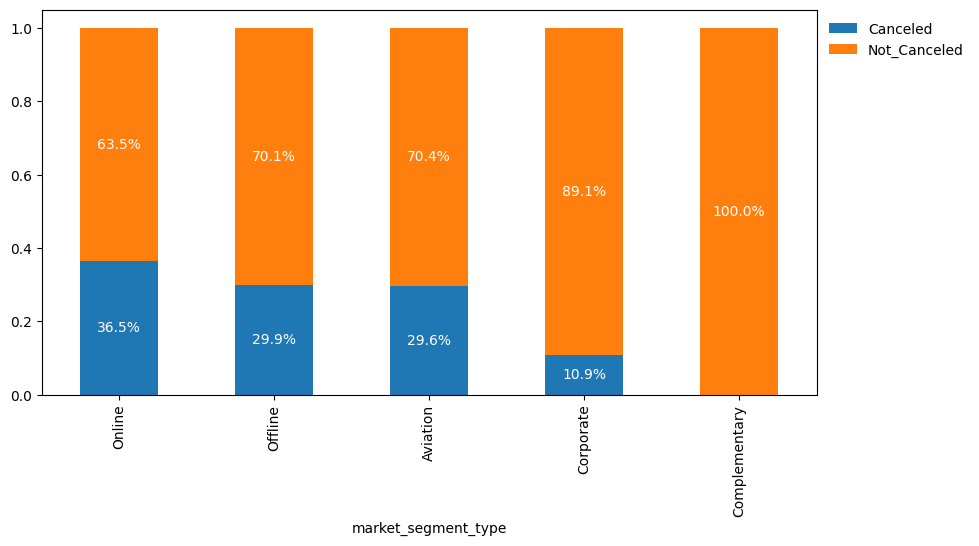

In [ ]:
stacked_barplot(data, 'market_segment_type', 'booking_status')

**How does booking status vary across different market segments?**

- `Online bookings` have the **highest cancellation rate at 36.5%**, indicating a more volatile customer group.

- `Offline` and `Aviation` segments show similar cancellation rates, **around 30%**.

- `Corporate` bookings are far more reliable, with only **19.9%** cancellations.

- `Complementary` bookings have **0%** cancellations, likely because these are non-revenue or special-case bookings.

- Overall, cancellation behavior clearly varies by market segment, which could be useful for **targeted policies or predictive modeling**.

#### Repeated Guests vs Booking status

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


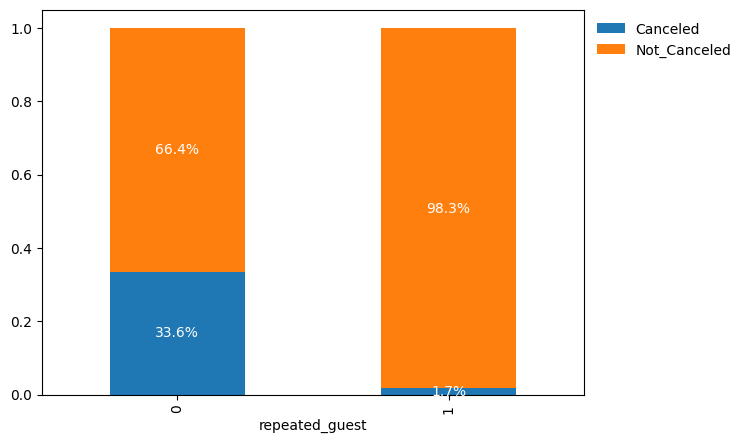

In [ ]:
stacked_barplot(data, 'repeated_guest', 'booking_status')

**Question # 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

- `Repeated Guests`:
  - Have an extremely **low cancellation rate with only 1.7%** of their bookings are canceled.
  - This suggests high loyalty and commitment, making them a reliable customer segment crucial for maintaining brand equity and steady revenue.

- `Non-Repeated Guests`:
  - Show a much **higher cancellation rate at 33.6%**, indicating greater unpredictability.
  - This group contributes more to booking volatility and may require targeted strategies (e.g., flexible policies or reminders) to reduce cancellations.


#### Number of Special Requests vs Booking Status

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


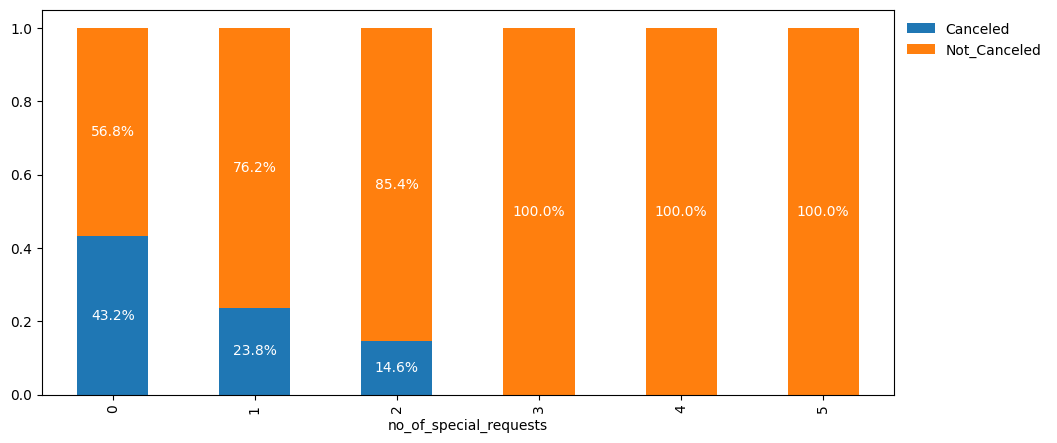

In [ ]:
stacked_barplot(data, 'no_of_special_requests', 'booking_status')

**Question # 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

- Guests with no special requests show the **highest cancellation rate at 43.2%**, indicating low commitment or possibly more flexible booking behavior.

- Guests with 1–2 special requests have **lower Cancellation rates** (23.8% and 14.6%, respectively). These guests appear more invested in their stay, likely planning ahead and intending to follow through.

- Guests with 3 or more special requests have a **0% cancellation rate**. This group shows the highest booking commitment, possibly due to specific needs that make finding alternatives harder or because of stronger intent to travel.

#### Number of Special Requests vs Average Price Per Room

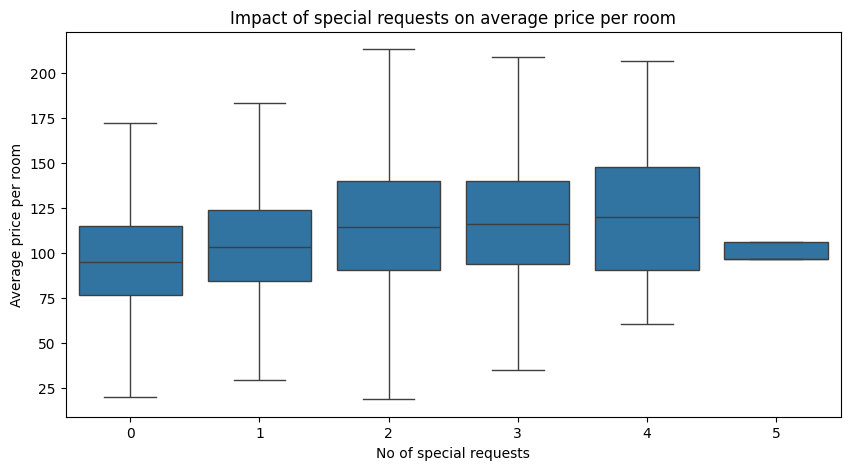

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = 'no_of_special_requests', y = 'avg_price_per_room', showfliers = False)  # Excluding outliers
plt.xlabel('No of special requests')
plt.ylabel('Average price per room')
plt.title('Impact of special requests on average price per room')
plt.show()

**How does the number of special requests made by the customers impact the room price?**

- As the number of special requests increases (from 0 to 4), the median price per room also tends to increase, suggesting that **guests who request more are willing to pay more**.

- Price variability increases with 2–4 requests, indicating a broader range of room types and price points for guests with moderate to high personalization needs.

- Guests with 0 or 1 request generally book lower-priced rooms, possibly reflecting more budget-conscious behavior.

- For 5 requests, prices cluster tightly around the median with very low variability, possibly due to a limited or specific room category frequently chosen by this group.

#### Average Price Per Room vs Booking Status

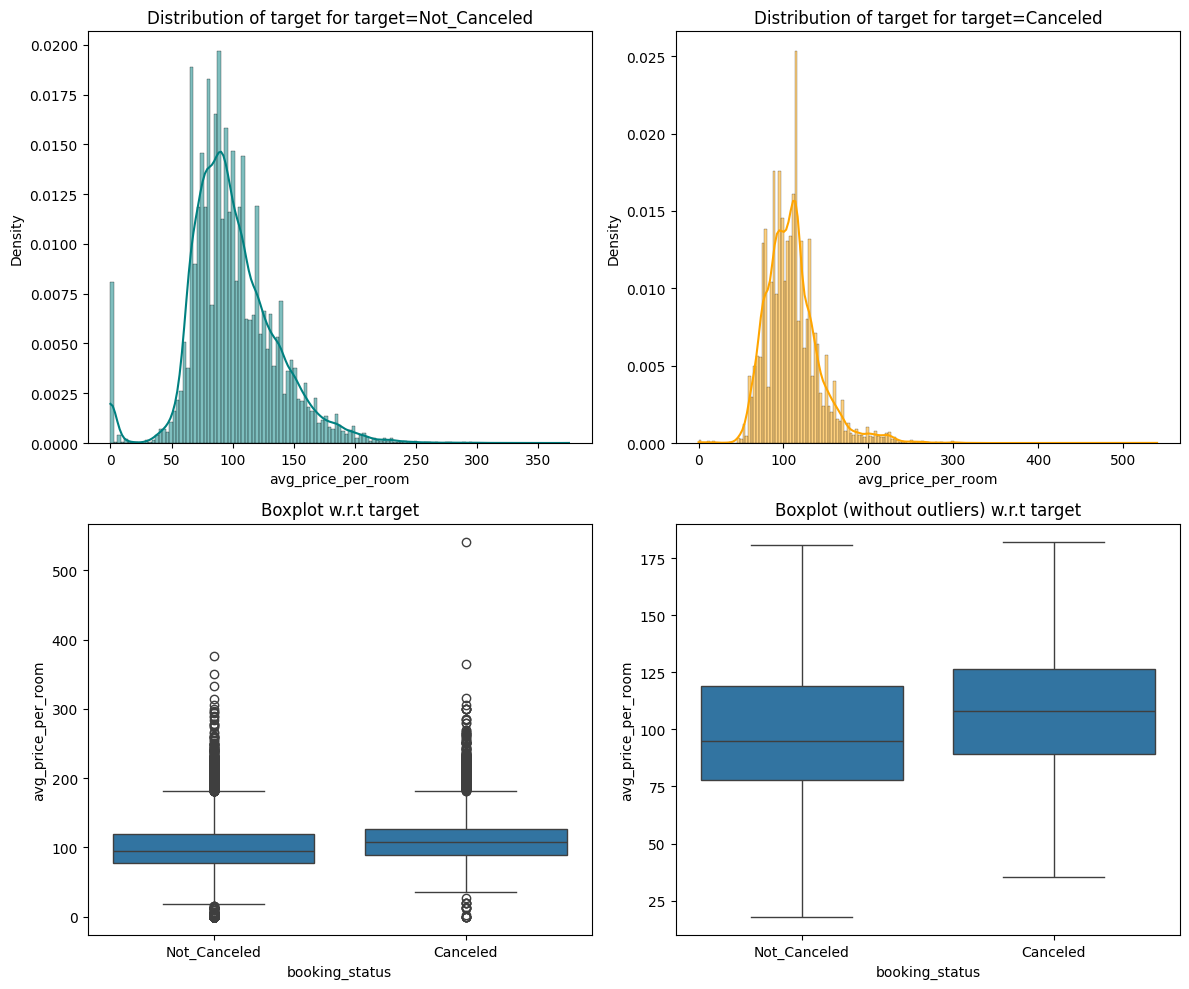

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

- Distribution shapes are similar for both canceled and not canceled bookings, but canceled bookings are slightly more right-skewed.

- **Canceled bookings have slightly higher median prices**, possibly because expensive bookings are made further in advance and are more likely to change.

- **Greater price variation and more outliers among canceled bookings** may reflect premium or flexible reservations, which are easier to cancel.

- **Non-canceled bookings** cluster more tightly, suggesting **lower-priced, committed stays** (such as non-refundable or last-minute deals).

#### Lead Time vs Booking Status

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

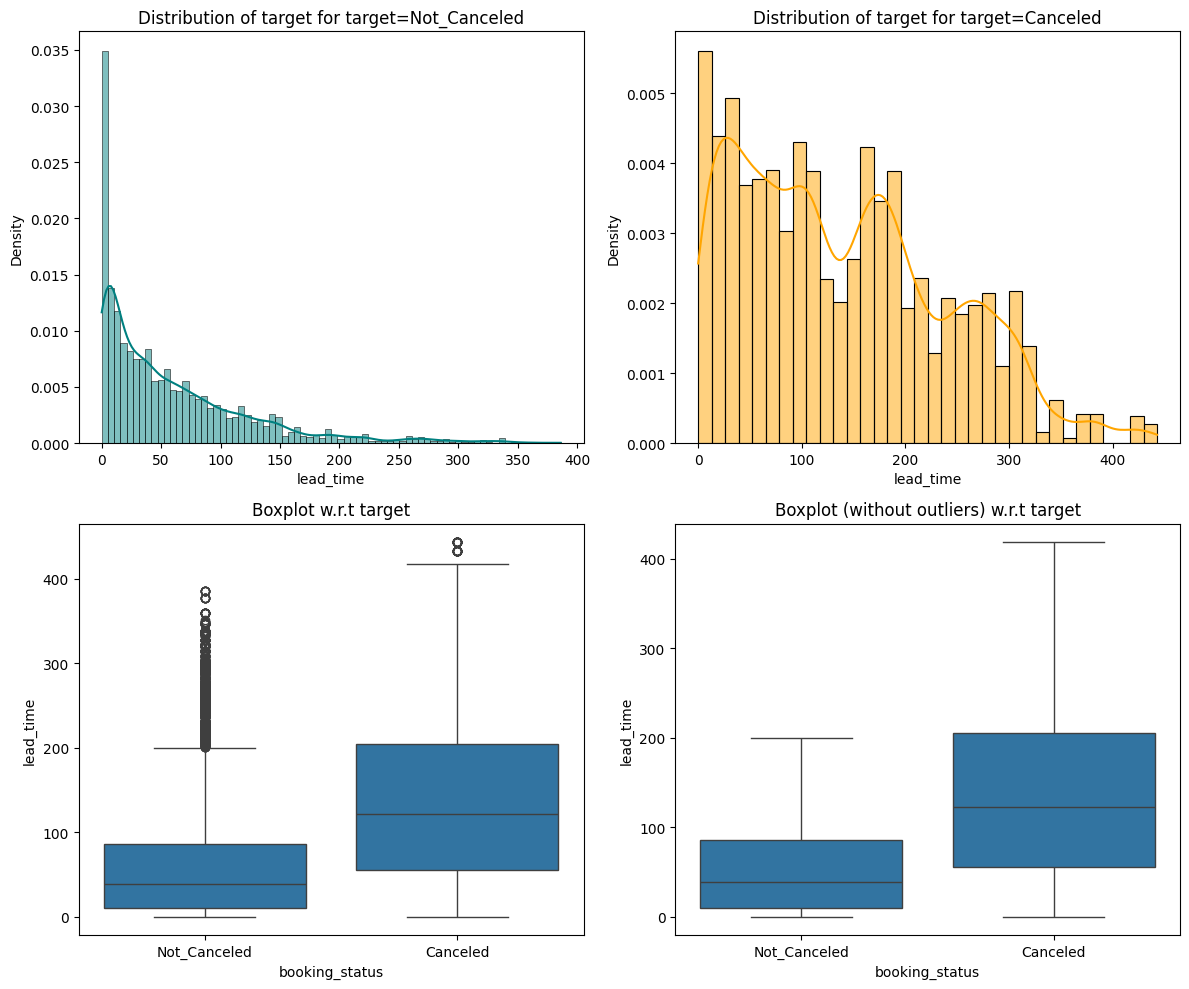

In [ ]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

- The distribution for canceled bookings is relatively more spread out, while not canceled bookings are tightly skewed toward low lead times.

- Canceled bookings have a much longer lead time on average — **bookings made far in advance are more likely to be canceled due to changing plans**.

#### Number of Family Members vs Booking Status

Since people often travel with their spouse and children for vacations or other activities, we will create a new DataFrame of customers who traveled with family and analyze its impact on booking status.


In [ ]:
family_data = data[(data['no_of_children'] >= 0) & (data['no_of_adults'] > 1)]
family_data.shape

(28441, 18)

In [ ]:
family_data['no_of_family_members'] = (family_data['no_of_adults'] + family_data['no_of_children'])

booking_status        Canceled  Not_Canceled    All
no_of_family_members                               
All                       9985         18456  28441
2                         8213         15506  23719
3                         1368          2425   3793
4                          398           514    912
5                            5            10     15
11                           1             0      1
12                           0             1      1
------------------------------------------------------------------------------------------------------------------------


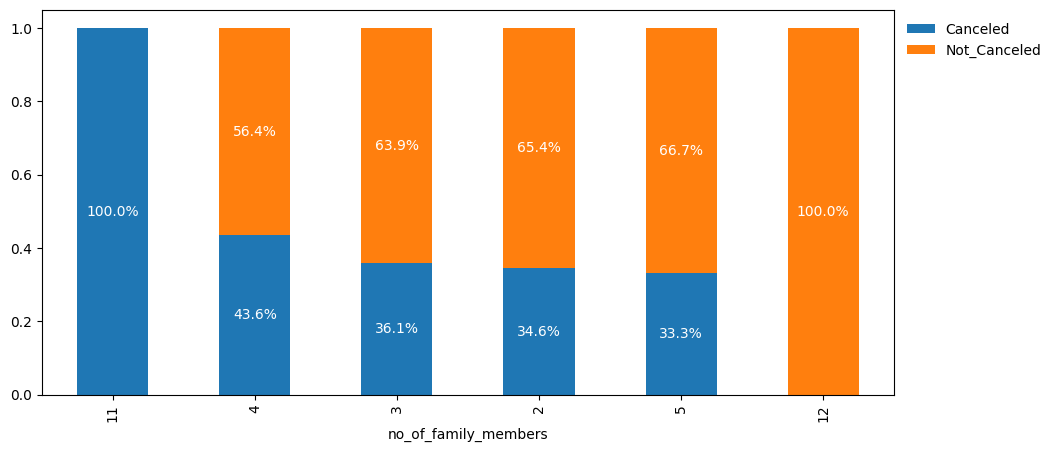

In [ ]:
stacked_barplot(family_data, 'no_of_family_members', 'booking_status')

- Most bookings are made by families of 2 or 3 people, and they have moderate cancellation rates (around 34–36%). These are the most reliable insights due to the large number of bookings.

- Bookings with 4 family members show the highest cancellation rate (44%) among the common group sizes. However, this seems like a one-off spike rather than part of a clear trend.

- Bookings with 5 family members have a lower cancellation rate (33%), but there are only 15 bookings total, so it’s not enough data to draw conclusions.

- Family sizes of 11 and 12 show 100% canceled or not canceled. However, each group has only 1 booking, thus, these results are not statistically meaningful.

- Overall, there is **no strong pattern between family size and cancellations**.

#### Total Nights vs Booking Status

**Analyzing customers with at least one night at the hotel.**

In [ ]:
stay_data = data[(data['no_of_week_nights'] > 0) & (data['no_of_weekend_nights'] > 0)]
stay_data.shape

(17094, 18)

In [ ]:
stay_data['total_nights'] = (stay_data['no_of_week_nights'] + stay_data['no_of_weekend_nights'])

booking_status  Canceled  Not_Canceled    All
total_nights                                 
All                 6115         10979  17094
3                   2183          3689   5872
4                   1387          2977   4364
5                    738          1593   2331
2                    639          1301   1940
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
19                     5             1      6
16                     5             1      6
17                     4             1      5
18                     3          

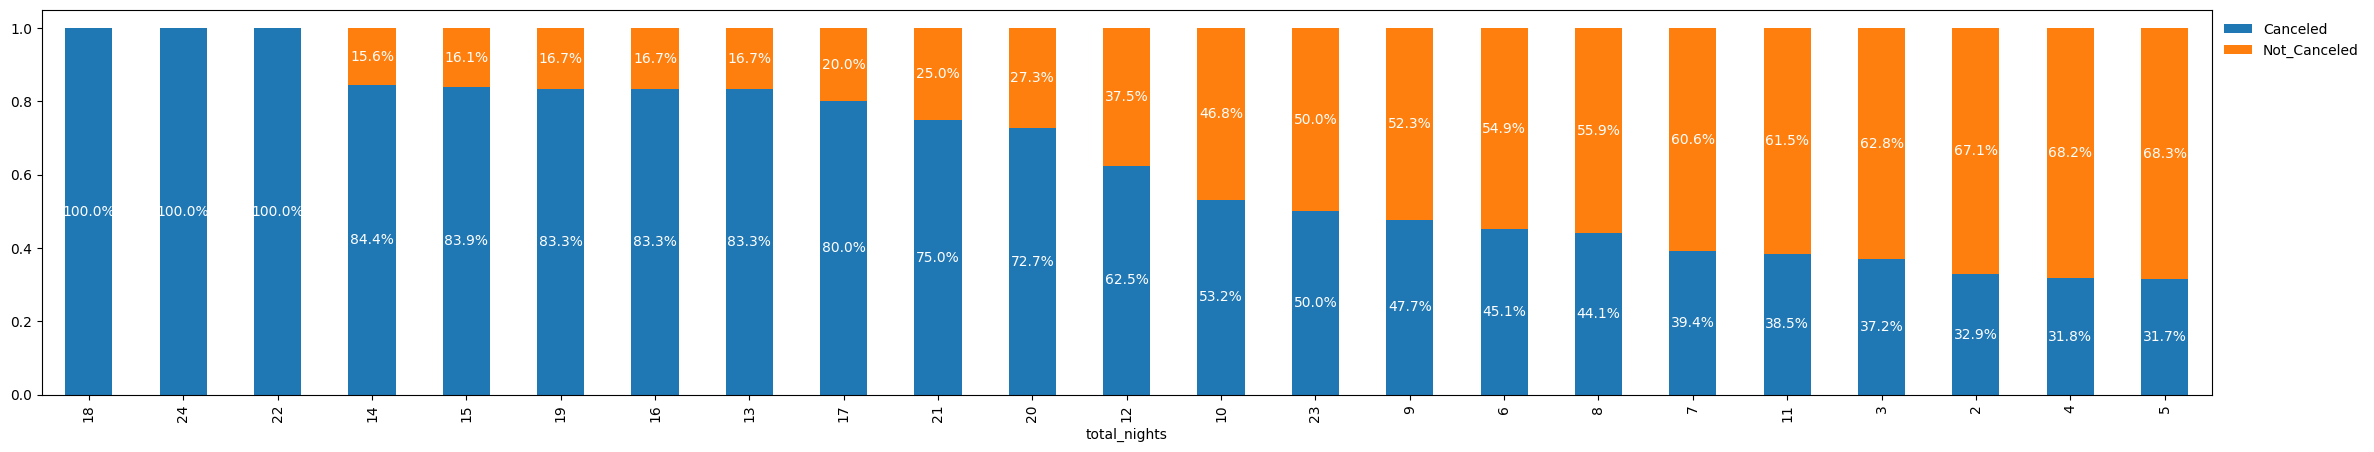

In [ ]:
stacked_barplot(stay_data, 'total_nights', 'booking_status')

Since it is difficult to read and find trends from these stacked bar plots, let's try plotting other graphs that are easier to interpret.

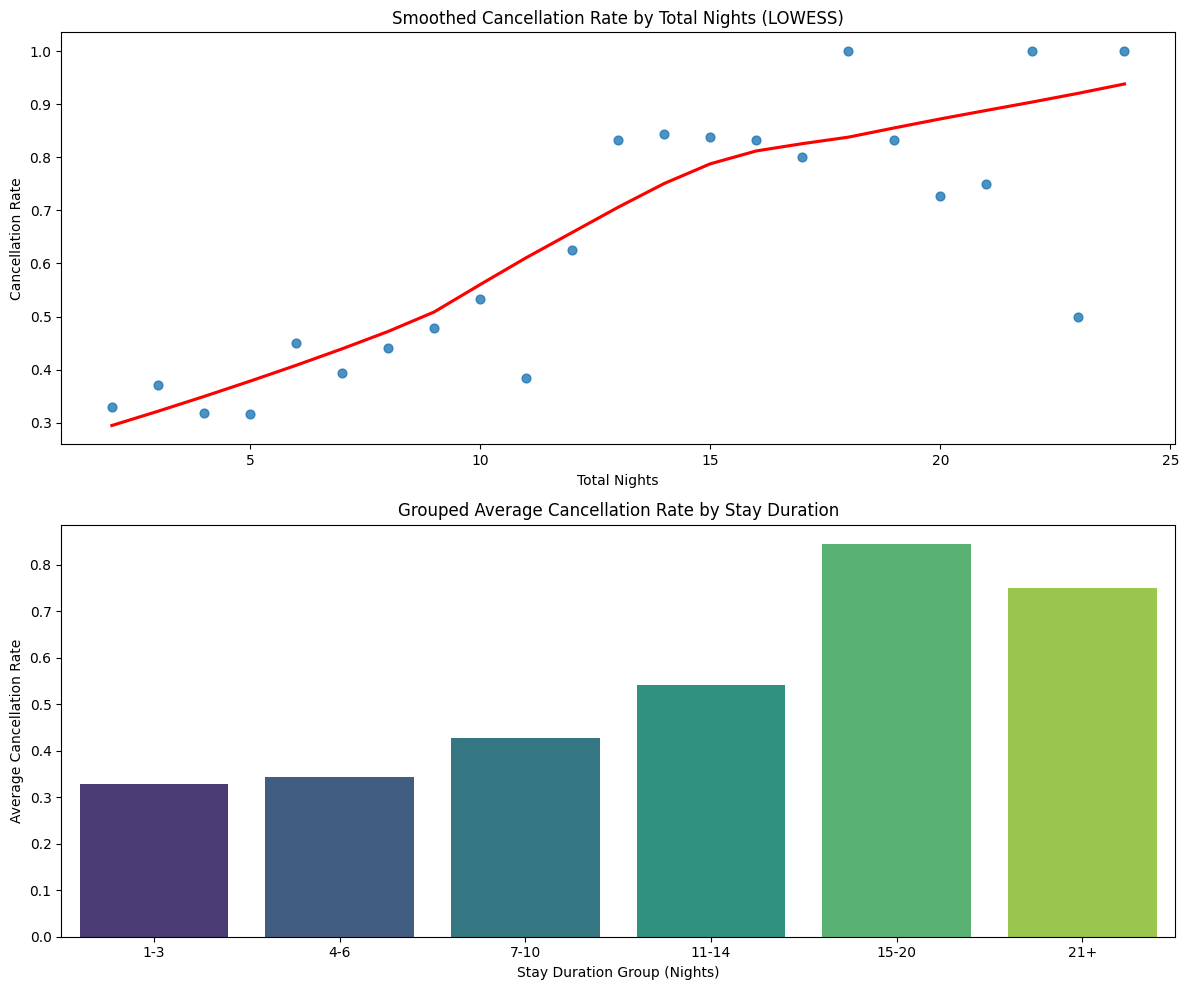

In [ ]:
# Plotting smoothed trend (LOWESS) and grouped average trend
# Calculating cancellation rate per total_nights
cancel_rate_df = (
    stay_data.groupby('total_nights')['booking_status']
    .apply(lambda x: (x == 'Canceled').mean())
    .reset_index()
    .rename(columns={'booking_status': 'cancel_rate'})
)

# Creating binned groups for total_nights
bins = [0, 3, 6, 10, 14, 20, stay_data['total_nights'].max() + 1]
labels = ['1-3', '4-6', '7-10', '11-14', '15-20', '21+']
stay_data['night_group'] = pd.cut(stay_data['total_nights'], bins=bins, labels=labels, right=False)

# Calculating average cancellation rate for each group
grouped_avg = (
    stay_data.groupby('night_group')['booking_status']
    .apply(lambda x: (x == 'Canceled').mean())
    .reset_index()
    .rename(columns={'booking_status': 'avg_cancel_rate'})
)

# Plotting the cancellation trends
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the smoothed trend (LOWESS)
sns.regplot(
    x='total_nights', y='cancel_rate', data=cancel_rate_df,
    lowess=True, ax=axs[0], scatter_kws={'s': 40}, line_kws={'color': 'red'}
)
axs[0].set_title('Smoothed Cancellation Rate by Total Nights (LOWESS)')
axs[0].set_ylabel('Cancellation Rate')
axs[0].set_xlabel('Total Nights')

# Plotting the grouped average trend
sns.barplot(x='night_group', y='avg_cancel_rate', data=grouped_avg, palette='viridis', ax=axs[1])
axs[1].set_title('Grouped Average Cancellation Rate by Stay Duration')
axs[1].set_ylabel('Average Cancellation Rate')
axs[1].set_xlabel('Stay Duration Group (Nights)')

plt.tight_layout()
plt.show()


- **Most bookings are short stays** (2–5 nights), and they have moderate cancellation rates (around 32–37%). These appear to be the most common and reliable bookings.

- Cancellations increase slightly for stays between 6–10 nights, but since there are fewer bookings in this range, the trend is less certain.

- Very long stays (13–20 nights) show very high cancellation rates, but they are based on very few bookings, so the results are **not reliable for drawing conclusions**.

- Stays longer than 20 nights (like 22, 23, or 24) are extremely rare, with only 1–2 bookings each, making them **statistically meaningless for analysis**.

#### Monthly Booking Trend

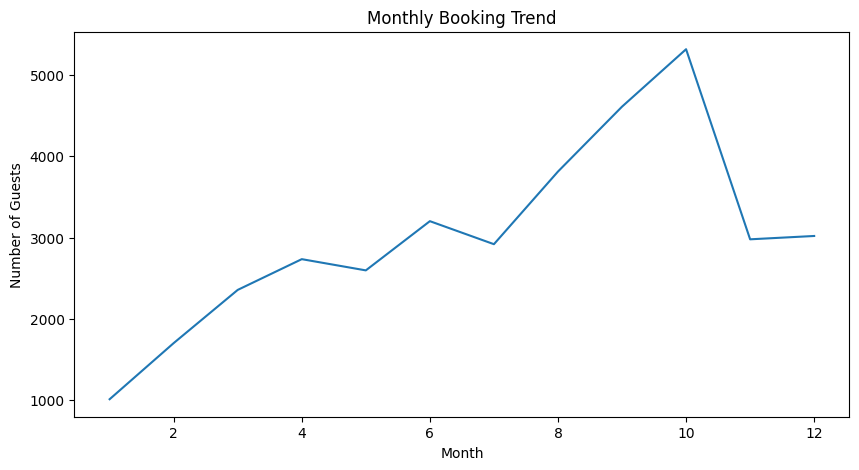

In [ ]:
# Counting bookings per arrival month
monthly_data = data["arrival_month"].value_counts().sort_index()

# Plotting the trend
monthly_data.plot(kind="line", figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Number of Guests")
plt.title("Monthly Booking Trend")
plt.show()


- This line plot supports the earlier univariate findings, showing **October as the peak booking month**, **January as the lowest**, and a **seasonal booking pattern** throughout the year.


#### Arrival Month vs Booking Status

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


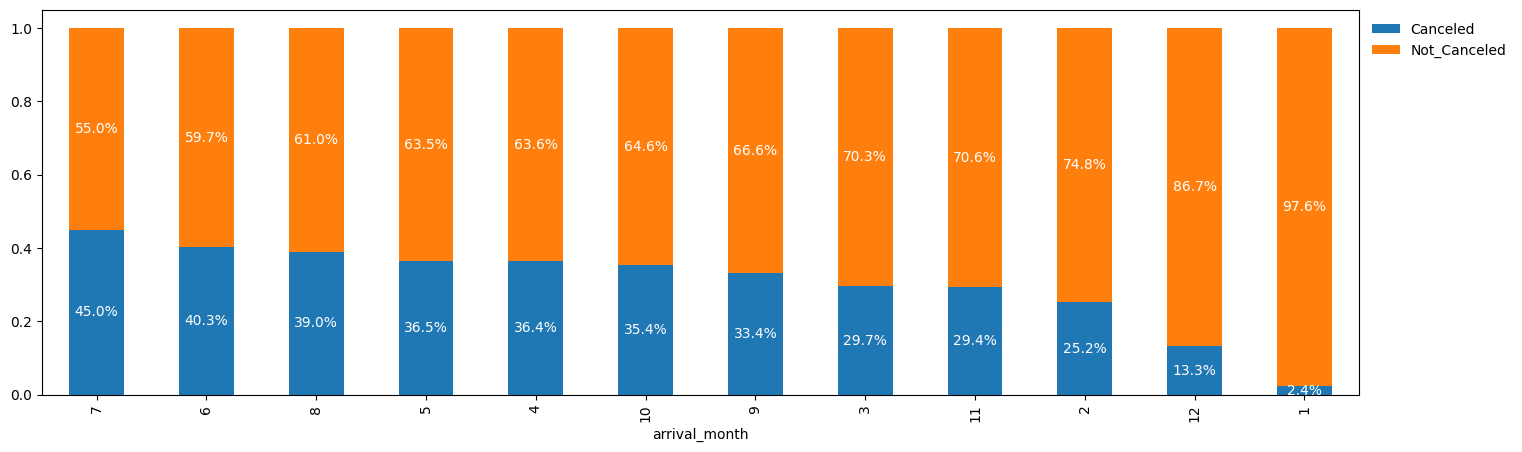

In [ ]:
stacked_barplot(data, 'arrival_month', 'booking_status')

**Combined Insights on Monthly Cancellation Rates and Booking Volume**
- While **July sees the most cancellations**, actual travel peaks later, in August to October, when bookings are both higher and more likely to go through.
This suggests that early summer plans are more flexible, but late summer to fall bookings are more serious.
- In contrast, **January has the fewest bookings and the lowest cancellation rate** (2.4%), reflecting a quiet but reliable off-season.

#### Arrival Month vs Average Price Per Room

**As hotel room prices are dynamic, let's check how the prices vary across different months.**

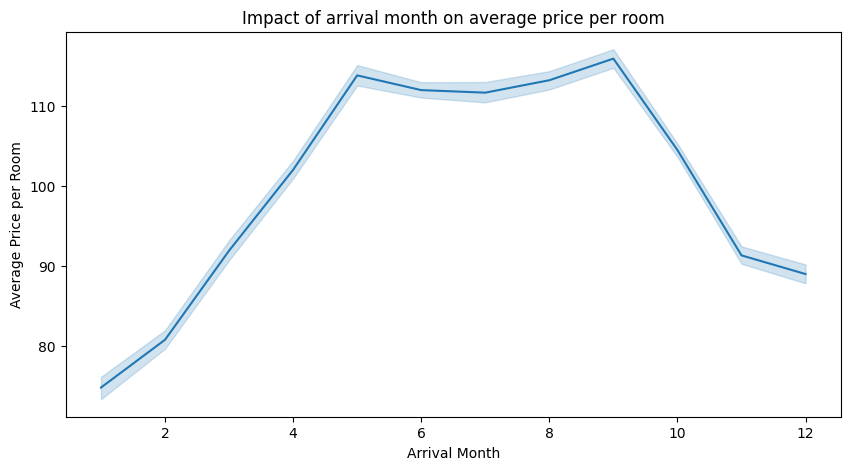

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = data, x = 'arrival_month' ,y = 'avg_price_per_room')
plt.xlabel('Arrival Month')
plt.ylabel('Average Price per Room')
plt.title('Impact of arrival month on average price per room')
plt.show()

- **Room prices peak twice: in May and September**, suggesting high pricing despite October having the most bookings and aligning with the start and end of the peak travel season.

- **October** has the highest booking volume, yet average prices slightly dip, possibly due to promotions, group discounts, or off-peak pricing strategies.

- The **off-season begins after October**, with **January** having the lowest average room price. This also aligns with low demand during the winter off-season.

## 5. Data Pre-processing

Data pre-processing may include the following processes depending on the need:
- Missing value treatment
- Feature engineering
- Outlier detection and treatment
- Preparing data for modeling
- Any other preprocessing steps

Based on our Data Overview, there are no missing or duplicated values, so **no missing value treatment is required**.

### 5.1. Feature Engineering

In [ ]:
# Converting target variable to numeric: 1 = Canceled, 0 = Not_Canceled
data["booking_status"] = data["booking_status"].map({'Not_Canceled': 0, 'Canceled': 1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

The remaining variables with object data type will be one-hot encoded later during data preparation for modeling logistic regression.

### 5.2. Outlier Check

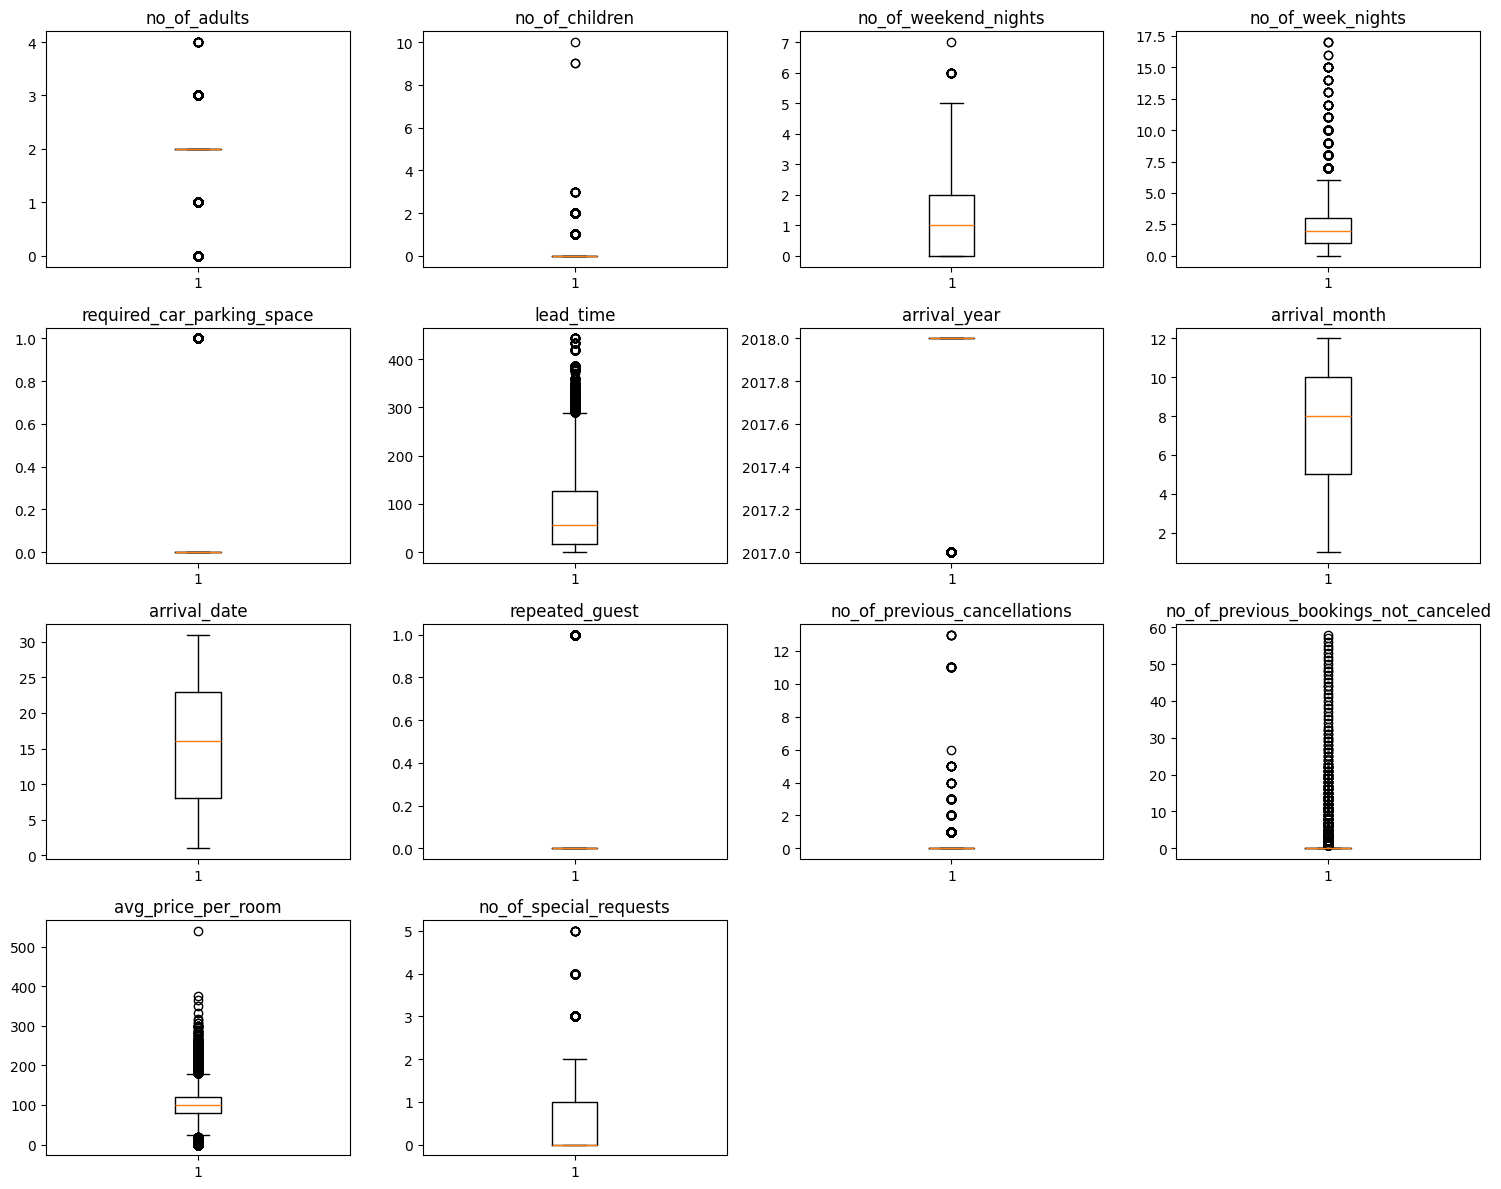

In [ ]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# Dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# Counting the number of 0 in no_of_adults

print("Number of 0s in 'no_of_adults':", (data['no_of_adults'] == 0).sum())

Number of 0s in 'no_of_adults': 139


-  There are 139 bookings with 0 adults, which is invalid and should be removed. This would improve data integrity and avoid misleading model training.

In [ ]:
# Removing rows with 0 in no_of_adults
data = data[data['no_of_adults'] != 0].copy()
print("Number of 0s in 'no_of_adults' after removal:", (data['no_of_adults'] == 0).sum())

Number of 0s in 'no_of_adults' after removal: 0


The rest of the outliers provide insights and removing them might negatively impact modeling and results. Thus, they will not be treated.



## 6. EDA Post-Data Processing

- Even though it's normally good practice to conduct EDA after pre-processing, there is not much done to the data yet (no data imputation, dropping of variables, etc.). Thus, we will only check those variables that we have processed so far.

### 6.1. Univariate Analysis Post-Data Processing

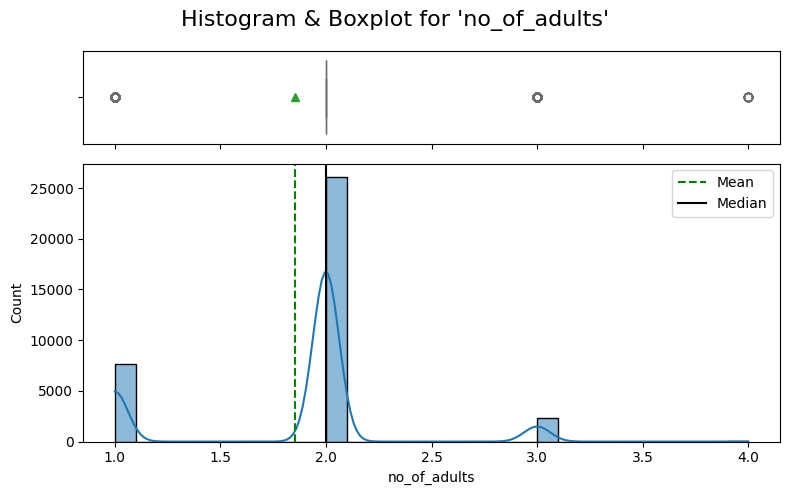

In [ ]:
histogram_boxplot(data, 'no_of_adults', kde=True, bins=30)

- The small number of outliers with 0 adults in the booking were successfully removed.

### 6.2. Bivariate Analysis Post-Data Processing

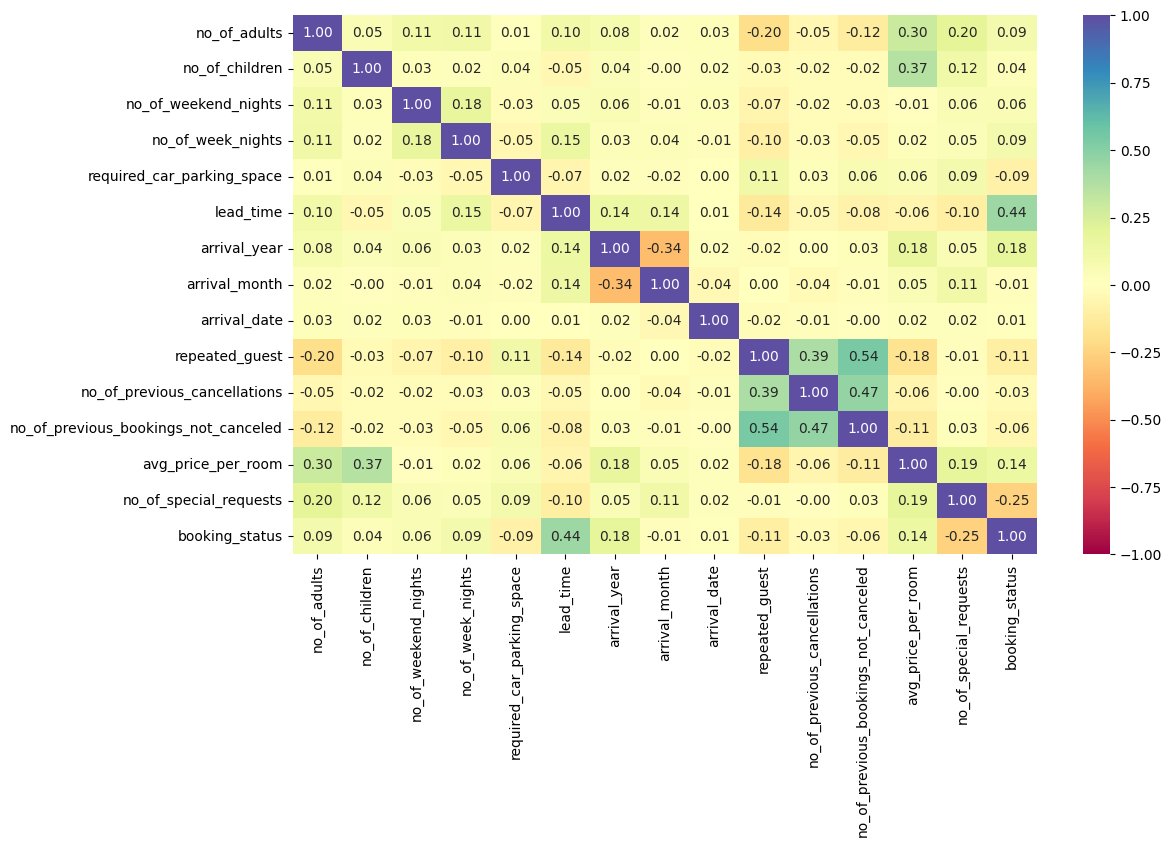

In [ ]:
# After converting target variable to numeric: 1 = Canceled, 0 = Not_Canceled

# Regenerating the list of numerical columns *after* the conversion
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Plotting a heatmap with the updated cols_list
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

This new heatmap includes the target variable, `booking_status`.

**Observations on the correlation of `booking_status` with other variables**

- `lead_time` has a moderate positive correlation (0.44) with cancellations, indicating that **bookings made far in advance are more likely to be canceled**.

- `no_of_special_requests` has a low negative correlation (−0.25), suggesting that **guests with more special requests tend to cancel less**.

- `repeated_guest` shows a small negative correlation (−0.11), meaning that **repeat guests are less likely to cancel**.

- `avg_price_per_room` has a slight positive correlation (0.14), implying that **higher-priced bookings are slightly more likely to be canceled**.


## 7. Building Classification Models

### 7.1. Model evaluation criterion

### Misclassification Risks in Booking Predictions

The model can make two types of errors:
1. **False Negative**: Predicts no cancellation, but the booking is canceled.
2. **False Positive**: Predicts cancellation, but the booking is honored.

### Which Matters More?

**False Negatives** are more critical for the hotel. If a likely cancellation is missed:
- The room may remain unsold, resulting in direct revenue loss.
- Last-minute cancellations lead to lower resale prices and reduced profit margins.
- Additional marketing and distribution costs may be incurred to resell the room.

### Reducing Impact

To minimize such losses, the model should aim to **reduce False Negatives** by maximizing **Recall** and optimizing the **F1 Score** to maintain a balance between recall and precision.

### 7.2. Logistic Regression Model (with statsmodels library)

#### 7.2.1. Data Preparation for Modeling (Logistic Regression)

- Our goal is to identify which bookings are likely to be canceled.  
- Before modeling, we need to encode the categorical variables.  
- To evaluate model performance effectively, we will split the data into training and testing sets.


In [ ]:
# Assiging predictors and target variables
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

# One-Hot Encoding
X = pd.get_dummies(X,drop_first=True)

# Converting all columns to float
X = X.astype(float)

# Adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25295, 28)
Shape of test set :  (10841, 28)
Percentage of classes in training set:
booking_status
0   0.67274
1   0.32726
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67134
1   0.32866
Name: proportion, dtype: float64


- Similar proportions of not canceled and canceled bookings in the training and test sets, so the class distribution is consistent and the model can be evaluated reliably on the test set.

#### 7.2.2. Automating Metrics and Confusion Matrix (statsmodels library)

- We will use the `model_performance_classification_statsmodels` function to evaluate the performance of my classification models.  

- We will use the `confusion_matrix_statsmodels` function to generate and visualize the confusion matrix.


In [ ]:
# Function to compute different metrics to check performance of a classification model built using statsmodels

def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # Rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### 7.2.3. Building Logistic Regression Model

In [ ]:
# Fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)  # Setting disp=False will remove the information on number of iterations

# Printing summary of the model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                35051
Model:                          Logit   Df Residuals:                    35024
Method:                           MLE   Df Model:                           26
Date:                Sat, 21 Jun 2025   Pseudo R-squ.:                  0.3277
Time:                        14:35:59   Log-Likelihood:                -14913.
converged:                      False   LL-Null:                       -22182.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                             0.0674      0.033      2.065      0.039       0.003       0.131
no_of_children                           0.1180      

**Interpretations**

- The initial logistic regression model was **fitted with all predictor variables**. Some variables, such as `lead_time`, `required_car_parking_space`, and `repeated_guest`, appear to be strong predictors based on their low p-values.

- However, the presence of variables with high p-values (e.g., `arrival_date`, `no_of_adults`, and several room/meal types) and the warning that the model did not converge suggest the **need to check for multicollinearity** (using VIF) and **consider removing insignificant predictors**.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80261 0.62503    0.73255 0.67453

**Interpretations**

- While the model shows an accuracy of 80.3%, this metric can be **misleading** due to class imbalance — only about one-third of the bookings are canceled. In such cases, a model could achieve high accuracy simply by predicting the majority class (not canceled) most of the time.

- Therefore, **recall, precision, and the F1 score** are more informative for evaluating model performance, especially when the goal is to minimize missed cancellations.

  - **Recall (62.5%)**: The model correctly identifies ~63% of the canceled bookings, which is important for minimizing missed cancellations (False Negatives).
  - **Precision (73.3%)**: Among the bookings predicted as canceled, ~73% are actually canceled, indicating relatively few False Positives.
  - **F1 Score (67.5%)**: The F1 score balances precision and recall, and indicates moderate performance in identifying cancellations.

Although this model's performance is reasonable, there is room for improvement, particularly in **recall**, given the business objective to catch as many cancellations as possible.


##### 7.2.3.1. Checking and Treating Multicollinearity

- To draw reliable statistical inferences from a logistic regression model, it is crucial to first check that the data does not suffer from multicollinearity.


In [ ]:
# Function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature            VIF
0                                  const 39422140.38107
1                           no_of_adults        1.33350
2                         no_of_children        2.01588
3                   no_of_weekend_nights        1.07104
4                      no_of_week_nights        1.09703
5             required_car_parking_space        1.03747
6                              lead_time        1.38590
7                           arrival_year        1.43029
8                          arrival_month        1.28210
9                           arrival_date        1.00741
10                        repeated_guest        1.78814
11          no_of_previous_cancellations        1.34619
12  no_of_previous_bookings_not_canceled        1.62425
13                    avg_price_per_room        2.05795
14                no_of_special_requests        1.25832
15         type_of_meal_plan_Meal Plan 2        1.26767
16         type_of_meal_plan_Meal Plan 3        1.01587
17        type_of_meal_plan_Not Selected        1.27683
18        room_type_reserved_Room_Type 2        1.03166
19        room_type_reserved_Room_Type 3        1.00301
20        room_type_reserved_Room_Type 4        1.37868
21        room_type_reserved_Room_Type 5        1.02865
22        room_type_reserved_Room_Type 6        2.03359
23        room_type_reserved_Room_Type 7        1.11113
24     market_segment_type_Complementary        4.28531
25         market_segment_type_Corporate       16.23153
26           market_segment_type_Offline       60.11335
27            market_segment_type_Online       66.74372

- Out of **26 variables**, most have VIF values below the commonly accepted threshold of 5, indicating low multicollinearity.  

- However, several `market_segment_type` dummies show **very high VIFs**:
  - `Corporate`: 16.23  
  - `Offline`: 60.11  
  - `Online`: 66.74  

- These suggest **strong multicollinearity**. One or more should be removed to improve model stability.



In [ ]:
def treating_multicollinearity_logit_statsmetrics(predictors, target, high_vif_columns, threshold=0.5):
    """
    Evaluates effect of dropping each high-VIF column on logistic model performance using classification metrics.

    predictors: independent variables (with constant)
    target: binary target variable (0 or 1)
    high_vif_columns: list of high VIF column names
    threshold: classification threshold
    """
    results = []

    for col in high_vif_columns:
        # Dropping one column
        X_temp = predictors.loc[:, ~predictors.columns.str.startswith(col)]

        # Fitting logistic regression model
        model = sm.Logit(target, X_temp).fit(disp=False)

        # Evaluating performance using your custom function
        perf = model_performance_classification_statsmodels(model, X_temp, target, threshold)
        perf["Dropped_Column"] = col

        results.append(perf)

    # Combining into one DataFrame
    results_df = pd.concat(results, ignore_index=True)
    return results_df[["Dropped_Column", "Accuracy", "Recall", "Precision", "F1"]].sort_values(by="Recall", ascending=False)


In [ ]:
high_vif_cols = [
    'market_segment_type_Corporate',
    'market_segment_type_Offline',
    'market_segment_type_Online'
]

In [ ]:
results = treating_multicollinearity_logit_statsmetrics(
    predictors=X_train,
    target=y_train,
    high_vif_columns=high_vif_cols,
    threshold=0.5  # Default, or adjust based on business needs
)

print(results)

                  Dropped_Column  Accuracy  Recall  Precision      F1
0  market_segment_type_Corporate   0.80229 0.62479    0.73185 0.67410
2     market_segment_type_Online   0.80233 0.62431    0.73222 0.67397
1    market_segment_type_Offline   0.80186 0.62370    0.73130 0.67323


In [ ]:
# Checking VIF after dropping market_segment_type_Offline
# Specifying the column to drop
col_to_drop = "market_segment_type_Offline"

# Specifying the train data from which to drop the column specified
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Checking VIF
vif = checking_vif(X_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  market_segment_type_Offline


feature            VIF
0                                  const 39306276.34750
1                           no_of_adults        1.31644
2                         no_of_children        2.01581
3                   no_of_weekend_nights        1.07009
4                      no_of_week_nights        1.09582
5             required_car_parking_space        1.03719
6                              lead_time        1.37780
7                           arrival_year        1.42648
8                          arrival_month        1.28136
9                           arrival_date        1.00740
10                        repeated_guest        1.78554
11          no_of_previous_cancellations        1.34617
12  no_of_previous_bookings_not_canceled        1.62371
13                    avg_price_per_room        2.05758
14                no_of_special_requests        1.25800
15         type_of_meal_plan_Meal Plan 2        1.26723
16         type_of_meal_plan_Meal Plan 3        1.01587
17        type_of_meal_plan_Not Selected        1.27676
18        room_type_reserved_Room_Type 2        1.03152
19        room_type_reserved_Room_Type 3        1.00301
20        room_type_reserved_Room_Type 4        1.36888
21        room_type_reserved_Room_Type 5        1.02862
22        room_type_reserved_Room_Type 6        2.03349
23        room_type_reserved_Room_Type 7        1.11109
24     market_segment_type_Complementary        1.32122
25         market_segment_type_Corporate        1.50975
26            market_segment_type_Online        1.78950

**Multicollinearity Treatment Decision**

- To address multicollinearity, we compared model performance after dropping each high-VIF market segment variable. The goal was to identify the variable whose removal would have the least negative impact on key performance metrics (accuracy, precision, recall, and F1 score).

- The performance differences were very small. Based on accuracy and precision, dropping either `market_segment_type_Corporate` or `market_segment_type_Online` gave slightly better results. If prioritizing recall—which is important for correctly identifying as many actual cancellations as possible—then dropping `Corporate` performed best.

- However, `Online` accounts for 64% of all bookings, making it a key business variable. Removing it could reduce model relevance and interpretability.

- Although Corporate appeared to be a strong candidate for removal based on metrics alone, dropping it (through an experiment) left mild multicollinearity in the data, indicating that the issue was not fully resolved.

- After dropping `Offline`, the VIF values for all remaining segment types dropped well below common thresholds, confirming it was the primary source of multicollinearity.

**Therefore,** to balance model performance, interpretability, and multicollinearity reduction, we chose to drop `market_segment_type_Offline`.


##### 7.2.3.2. Removing Insignificant Variables Based on p-values

We will remove variables that have a p-value > 0.05, since they are not statistically significant in predicting the target.

However, we won’t drop all high p-value variables at once, because removing one variable can change the p-values of the others. Instead, we'll take an iterative approach:

1. Build a model and check the p-values.
2. Drop the variable with the highest p-value (if it's above 0.05).
3. Rebuild the model without that variable.
4. Repeat this process until all remaining variables have p-values less than or equal to 0.05.

This step-by-step method can be done manually, but using a loop makes it faster and easier to manage.

In [ ]:
# Initial list of columns
cols = X_train1.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    x_train_aux = X_train1[cols]

    # Fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Online']


In [ ]:
X_train2 = X_train1[selected_features]
X_test2 = X_test1[selected_features]

In [ ]:
# Training and fitting logistic regression on X_train2 and y_train
logit1 = sm.Logit(y_train, X_train2)
lg1 = logit1.fit(disp=False)  # Setting disp=False will remove the information on number of iterations
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25276
Method:                           MLE   Df Model:                           18
Date:                Sat, 21 Jun 2025   Pseudo R-squ.:                  0.3209
Time:                        13:25:55   Log-Likelihood:                -10860.
converged:                       True   LL-Null:                       -15992.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -814.4250    115.835     -7.031      0.000   -1041.458    -587.392
no_of_weekend_nights               0.1471      0.020      7.418      0.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1,X_train2, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80245 0.62479    0.73227 0.67427

**Model Refinement Summary**

- We started with 25 variables and brought the model down to 18 by removing multicollinear features and dropping those that weren’t statistically significant (p-value > 0.05).

- Even with fewer variables, the model performs just as well as before. The accuracy, recall, precision, and F1 score are all the same up to two decimal places. This shows that the variables we removed weren’t really adding value, and now the model is simpler and easier to work with.


#####  7.2.3.3. Interpreting Logistic Regression Coefficients
- The coefficients from a logistic regression model are expressed in terms of **log-odds**. To interpret them in terms of actual odds, we take the exponential of each coefficient:

    **odds = exp(β)**

- To understand the effect in percentage terms, we calculate the percentage change in odds as:

    **percentage change in odds = (exp(β) - 1) × 100**

- This tells us how much the odds of the outcome increase or decrease with a one-unit change in the predictor variable.


In [ ]:
# Converting coefficients to odds
odds = np.exp(lg1.params)

# Finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_weekend_nights  no_of_week_nights  \
Odds           0.00000               1.15853            1.02595   
Change_odd% -100.00000              15.85253            2.59499   

             required_car_parking_space  lead_time  arrival_year  \
Odds                            0.20862    1.01566       1.49393   
Change_odd%                   -79.13760    1.56570      49.39288   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.95764         0.11084                       1.16764   
Change_odd%       -4.23627       -88.91637                      16.76357   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.01935                 0.24141   
Change_odd%             1.93542               -75.85897   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.29190                         0.74766   
Change_odd%                        29.18967                       -25.23417   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.79114                         0.44281   
Change_odd%                       -20.88574                       -55.71946   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.47562                         0.28225   
Change_odd%                       -52.43823                       -71.77535   

             market_segment_type_Corporate  market_segment_type_Online  
Odds                               2.36970                     5.58818  
Change_odd%                      136.97041                   458.81831

**Coefficient Interpretations**

**High Impact Variables (≥ ±50%)**

* `market_segment_type_Online`:
  Online bookings have **458.82% higher odds** of being canceled — the strongest positive effect in the model.

* `market_segment_type_Corporate`:
  Corporate bookings are **136.97% more likely** to be canceled.

* `repeated_guest`:
  Repeat guests have **88.92% lower odds** of canceling.

* `required_car_parking_space`:
  Guests requesting parking have **79.14% lower odds** of cancellation.

* `no_of_special_requests`:
  Each additional special request reduces cancellation odds by **75.86%**.

* `room_type_reserved_Room_Type 7`:
  Associated with a **71.78% decrease** in cancellation odds.

* `room_type_reserved_Room_Type 5`:
  Leads to a **55.72% reduction** in cancellation odds.

* `room_type_reserved_Room_Type 6`:
  Reduces odds by **52.44%**.


**Moderate Impact Variables (±10% to ±50%)**

* `arrival_year`:
  Later years show a **49.39% increase** in cancellation odds.

* `type_of_meal_plan_Not Selected`:
  Not selecting a meal plan increases odds by **29.19%**.

* `room_type_reserved_Room_Type 2`:
  Associated with a **25.23% decrease** in cancellation odds.

* `room_type_reserved_Room_Type 4`:
  Linked to a **20.89% decrease** in odds.

* `no_of_previous_cancellations`:
  Increases cancellation odds by **16.76%**.

* `no_of_weekend_nights`:
  Each extra weekend night increases odds by **15.85%**.

**Low Impact Variables (≤ ±10%)**

* `avg_price_per_room`:
  A higher room price increases odds by **1.94%**.

* `lead_time`:
  Slightly increases cancellation odds by **1.57%**.

* `no_of_week_nights`:
  Each additional weeknight increases odds by **2.59%**.

* `arrival_month`:
  Later arrival months reduce odds by **4.24%**.

The intercept (`const`) reflects the log-odds of cancellation when all predictors are set to zero, which usually does not correspond to a realistic scenario (e.g., 0 nights, 0 price, no meal plan, etc.).


##### 7.2.3.4. Checking model performance on the training set

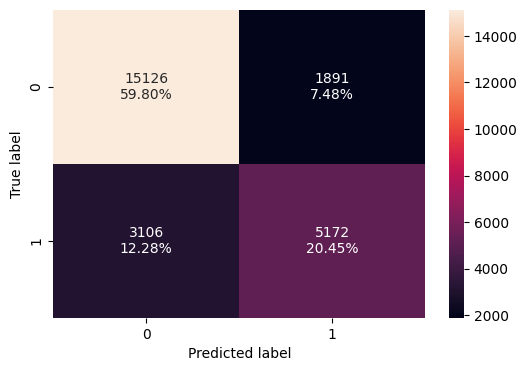

In [ ]:
confusion_matrix_statsmodels(lg1, X_train2, y_train)

- **12.3%** of actual cancellations were missed by the model (false negatives).  
- **7.5%** of non-cancellations were wrongly predicted as cancellations (false positives).



In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train2, y_train)
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80245 0.62479    0.73227 0.67427

##### 7.2.3.5. ROC-AUC
**ROC-AUC on training set**

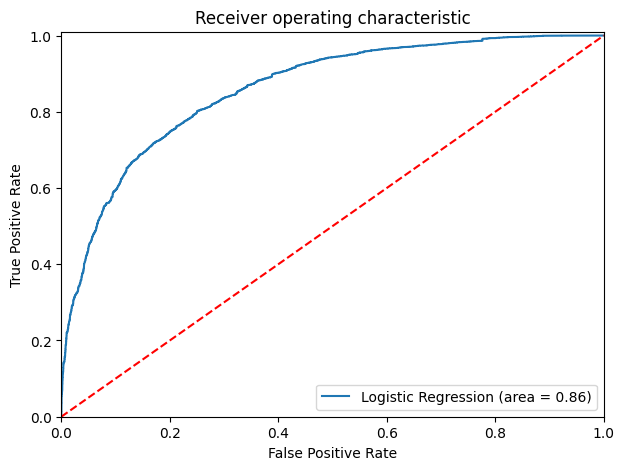

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Right now, the model can distinguish between canceled and non-canceled bookings 86% of the time.

#### 7.2.4. Model Performance Improvement

* We will try to improve the recall score of the model by changing the model threshold using AUC-ROC Curve.

##### 7.2.4.1. Optimal threshold using AUC-ROC curve

To choose the best threshold for classifying cancellations, we use the ROC curve, which shows the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at different threshold values.

- The **optimal threshold** is the point on the ROC curve where **TPR is high** and **FPR is low**.
- This is found by maximizing the difference between TPR and FPR.
- The threshold at this point gives the best balance between correctly identifying cancellations and minimizing false alarms.


In [ ]:
# Calculating optimal threshold as per AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2949670261156916


- Optimal threshold based on the AUC-ROC curve is 0.29.

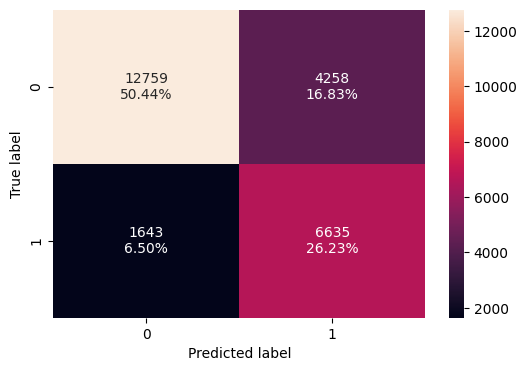

In [ ]:
confusion_matrix_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

- FN decreased to 6.5%, but the FP increased to 16.8%.

In [ ]:
# Checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.76671 0.80152    0.60911 0.69219

- Recall score increased, but the Precision score decreased.

##### 7.2.4.2. Optimal threshold using Precision-Recall

To choose the best threshold for classification, we can also analyze how **precision** and **recall** vary across threshold values.

This plot helps us find a threshold where both metrics are reasonably high.  
As the threshold increases:
- **Precision** increases (fewer false positives),
- **Recall** decreases (more false negatives).

The **optimal threshold** is often selected where **precision and recall are balanced**, or where the **F1 score is maximized**, depending on the business priority.

In this case (cancellation prediction), we care more about recall to catch as many cancellations as possible, while keeping precision acceptable — so we may lean slightly toward thresholds that favor higher recall.


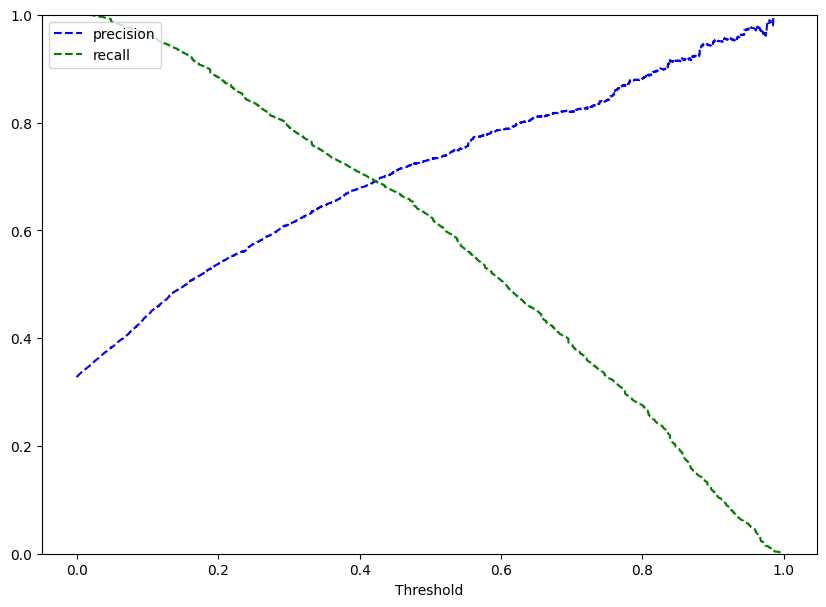

In [ ]:
y_scores = lg1.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# Setting the threshold based on the Precision-Recall curve
optimal_threshold_curve = 0.42

##### 7.2.4.3. Checking model performance on training set

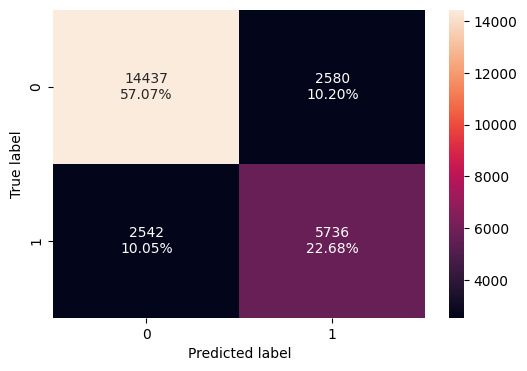

In [ ]:
confusion_matrix_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.79751 0.69292    0.68975 0.69133

- The Recall and Precision scores of this model are closer to each other (i.e., more balanced).

##### 7.2.4.4. Checking model performance on test set

**Using model with default threshold**

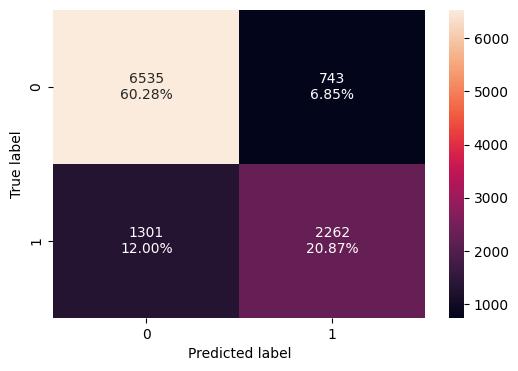

In [ ]:
confusion_matrix_statsmodels(lg1, X_test2, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test2, y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.81146 0.63486    0.75275 0.68879

**ROC curve on test set**

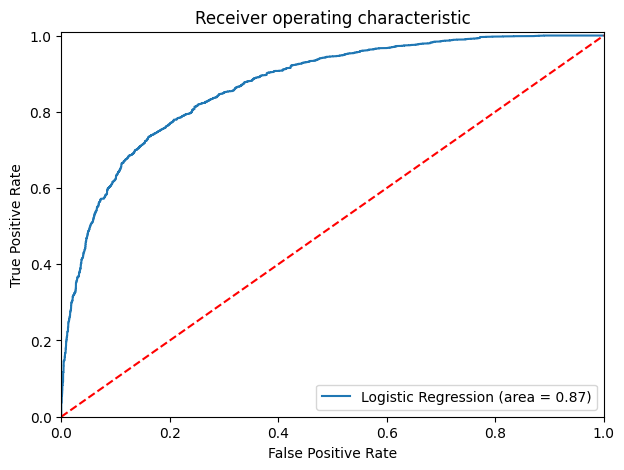

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- The model can distinguish between canceled and non-canceled bookings 87% of the time on the test data, which is very close to the results of the training set.

**Using model with threshold = 0.29**

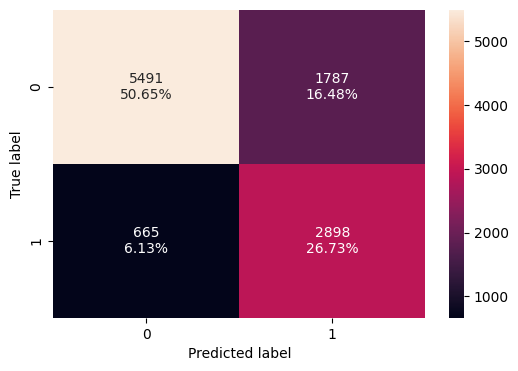

In [ ]:
confusion_matrix_statsmodels(lg1, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# Checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.77382 0.81336    0.61857 0.70272

**Using model with threshold = 0.42**

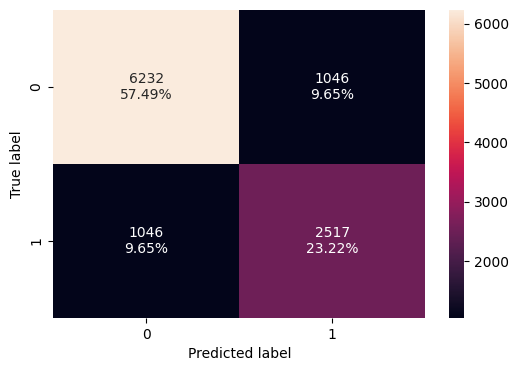

In [ ]:
confusion_matrix_statsmodels(lg1, X_test2, y_test, threshold = optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80703 0.70643    0.70643 0.70643

#### 7.2.5. Model Performance Summary

In [ ]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.29 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80245   
Recall                                   0.62479   
Precision                                0.73227   
F1                                       0.67427   

           Logistic Regression-0.29 Threshold  \
Accuracy                              0.76671   
Recall                                0.80152   
Precision                             0.60911   
F1                                    0.69219   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79751  
Recall                                0.69292  
Precision                             0.68975  
F1                                    0.69133

In [ ]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.29 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.81146   
Recall                                   0.63486   
Precision                                0.75275   
F1                                       0.68879   

           Logistic Regression-0.29 Threshold  \
Accuracy                              0.77382   
Recall                                0.81336   
Precision                             0.61857   
F1                                    0.70272   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80703  
Recall                                0.70643  
Precision                             0.70643  
F1                                    0.70643

### Logistic Regression Model - Threshold Selection

- **Threshold 0.29** is ideal if the hotel manager wants to minimize missed cancellations (**false negatives**). With recall at 80% (train) and 81% (test), the model catches most actual cancellations, allowing the hotel to act early — for example, by releasing inventory, applying overbooking strategies, or following up with guests. However, precision drops to around 61–62%, meaning more bookings may be wrongly flagged as cancellations, potentially leading to operational inefficiencies or guest dissatisfaction.

- **Threshold 0.42** offers a **more balanced approach**. With both precision and recall around 69–70%, it reduces **false positives** compared to the 0.29 model, though it captures fewer actual cancellations. This threshold is appropriate if the hotel wants to maintain a balance between identifying cancellations and avoiding overbooking.

- **The default threshold (0.5)** gives the highest accuracy (80–81%) but the lowest recall (62–63%). This means many cancellations are missed, which could lead to lost revenue if the hotel isn’t able to rebook in time. While precision is relatively high (73–75%), this threshold is the least recommended if anticipating cancellations is a business priority.

- Across all thresholds, test set performance is comparable to or slightly better than training set results, suggesting the model generalizes well and is **not overfitting**.


### 7.3. Decision Tree (with sklearn library)

#### 7.3.1. Data Preparation for Modeling (Decision Tree)

* Unlike Logisitc Regression models, **Decision Trees do not require independent predictors**, so multicollinearity is not a concern.
* **Dropping variables based on p-values is only relevant for logistic regression**, not decision trees, which use information gain to select features.
* Therefore, we will re-split the data into train and test and **use the preprocessed data** right after splitting.


In [ ]:
# Reassigning predictors and target variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# One-hot encoding
X = pd.get_dummies(X, drop_first = True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.03, random_state = 1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (35051, 27)
Shape of test set :  (1085, 27)
Percentage of classes in training set:
booking_status
0   0.67185
1   0.32815
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.68756
1   0.31244
Name: proportion, dtype: float64


#### 7.3.2. Automating Metrics and Confusion Matrix (sklearn library)
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# Function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Function to plot the confusion matrix of a classification model built using sklearn

def confusion_matrix_sklearn(model, predictors, target):
    """
    Plotting the confusion matrix with percentage annotations

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Generating predicted labels using the trained model
    y_pred = model.predict(predictors)

    # Computing the confusion matrix (actual vs predicted)
    cm = confusion_matrix(target, y_pred)

    # Creating labels that include both counts and percentages
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")  # Adding both count and % in each cell
    plt.ylabel("True label")               # Labeling y-axis as actual values
    plt.xlabel("Predicted label")          # Labeling x-axis as predicted values


#### 7.3.3. Building Decision Tree Model

In [ ]:
# Building and fitting the model on training data
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

##### 7.3.3.1. Checking model performance on training set

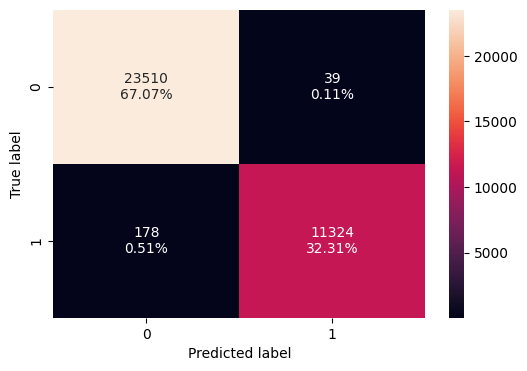

In [ ]:
# Confusion matrix on training data
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# Metrics evaluating model performance on training data
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99381 0.98452    0.99657 0.99051

##### 7.3.3.2. Checking model performance on test set

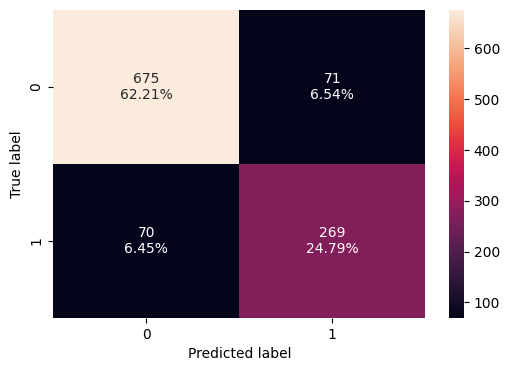

In [ ]:
# Building and fitting the model on test data
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# Metrics evaluating model performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87005 0.79351    0.79118 0.79234

- The nearly perfect performance of the model on training data (98-99%) and the
much lower scores on test data (79-87%) shows that the current decision tree model is **overfitting the training data**.
- Decision trees are powerful supervised machine learning tool that:
  - are not sensitive to outliers and null values.
  - do not require underlying assumptions about the data.
  - can handle both categorical and continuous variables.
  - work with linearly and non-linearly related variables.
  - are easy to understand and interpret.
- However, they tend to overfit the data when allowed to grow into full trees.
- To address this issue, we will perform **pre-pruning** and **post-pruning on the tree**.

**Before pruning the tree, we should check the most important features.**

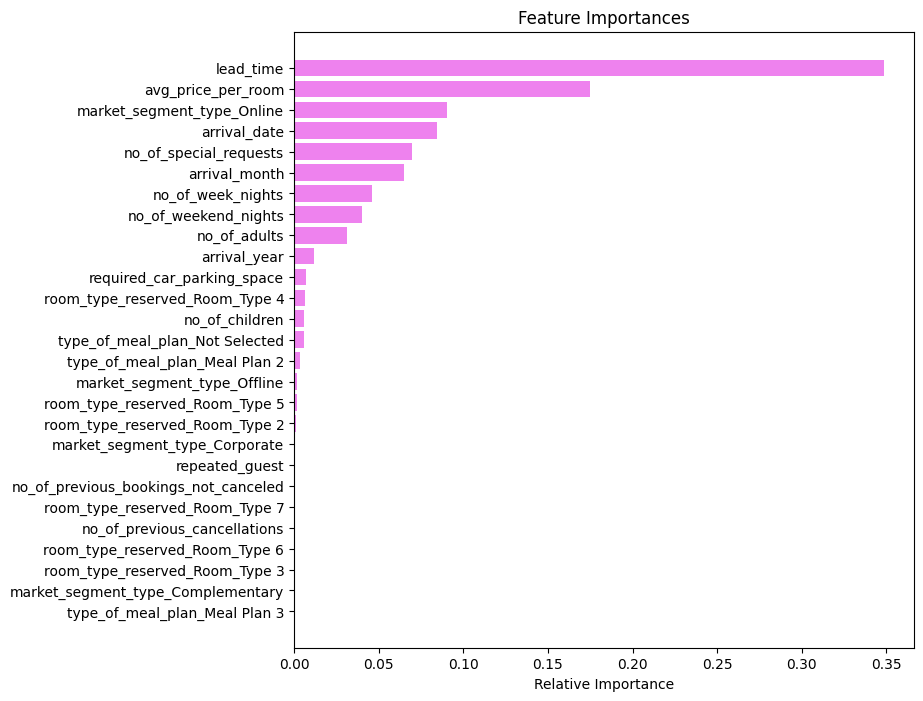

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The Decision Tree model identifies `lead_time`, `avg_price_per_room`, `market_segment_type_Online`, `arrival_date`, and `no_of_special_requests` as its top five predictors. In contrast, the Logistic Regression model highlights `market_segment_type_Online`, `market_segment_type_Corporate`, `repeated_guest`, `required_car_parking_space`, and `no_of_special_requests` based on their impact on cancellation odds.

- Despite using different criteria for ranking features, both models agree on the importance of `market_segment_type_Online` and `no_of_special_requests`, suggesting these are consistently strong indicators of cancellation risk.

- Notably, the Decision Tree gives significant weight to `lead_time`, indicating that how far in advance a booking is made is a key factor in predicting cancellations.

- Moreover, this plot highlights that a significant number of variables do not add value to the predictive model.

#### 7.3.4. Pre-pruning the tree

**Pre-Pruning**
- Pre-pruning involves **restricting tree growth** during model training by setting limits such as maximum depth, minimum samples to split, or maximum number of leaf nodes.

- It helps prevent overfitting **early** by stopping the tree from becoming overly complex.

- Hyperparameters are tuned using **GridSearchCV**, which systematically tests multiple combinations to find the best-performing settings.

- The resulting tree is simpler and often generalizes better, especially when cross-validation is used to validate performance.


In [ ]:
# Choosing the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Running the grid search - hyperparamter tuning
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(6),
                       max_leaf_nodes=75, min_samples_split=30, random_state=1)

- The best Decision Tree obtained through pre-pruning uses the following hyperparameters: `class_weight='balanced'`, `max_depth=6`, `max_leaf_nodes=75`, `min_samples_split=30`, and `random_state=1`.


##### 7.3.4.1 Pre-pruning performance on training set

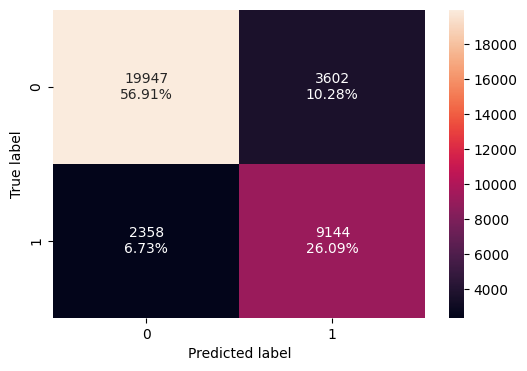

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.82996 0.79499    0.71740 0.75421

##### 7.3.4.2. Pre-pruning performance on test set

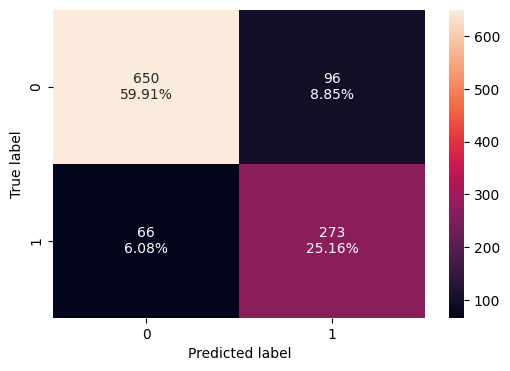

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.85069 0.80531    0.73984 0.77119

- In contrast to the unpruned Decision Tree, the pre-pruned version shows similar or slightly better performance on the test set compared to the training set, indicating that pre-pruning helps reduce overfitting.


#### 7.3.5. Visualizing the Decision Tree

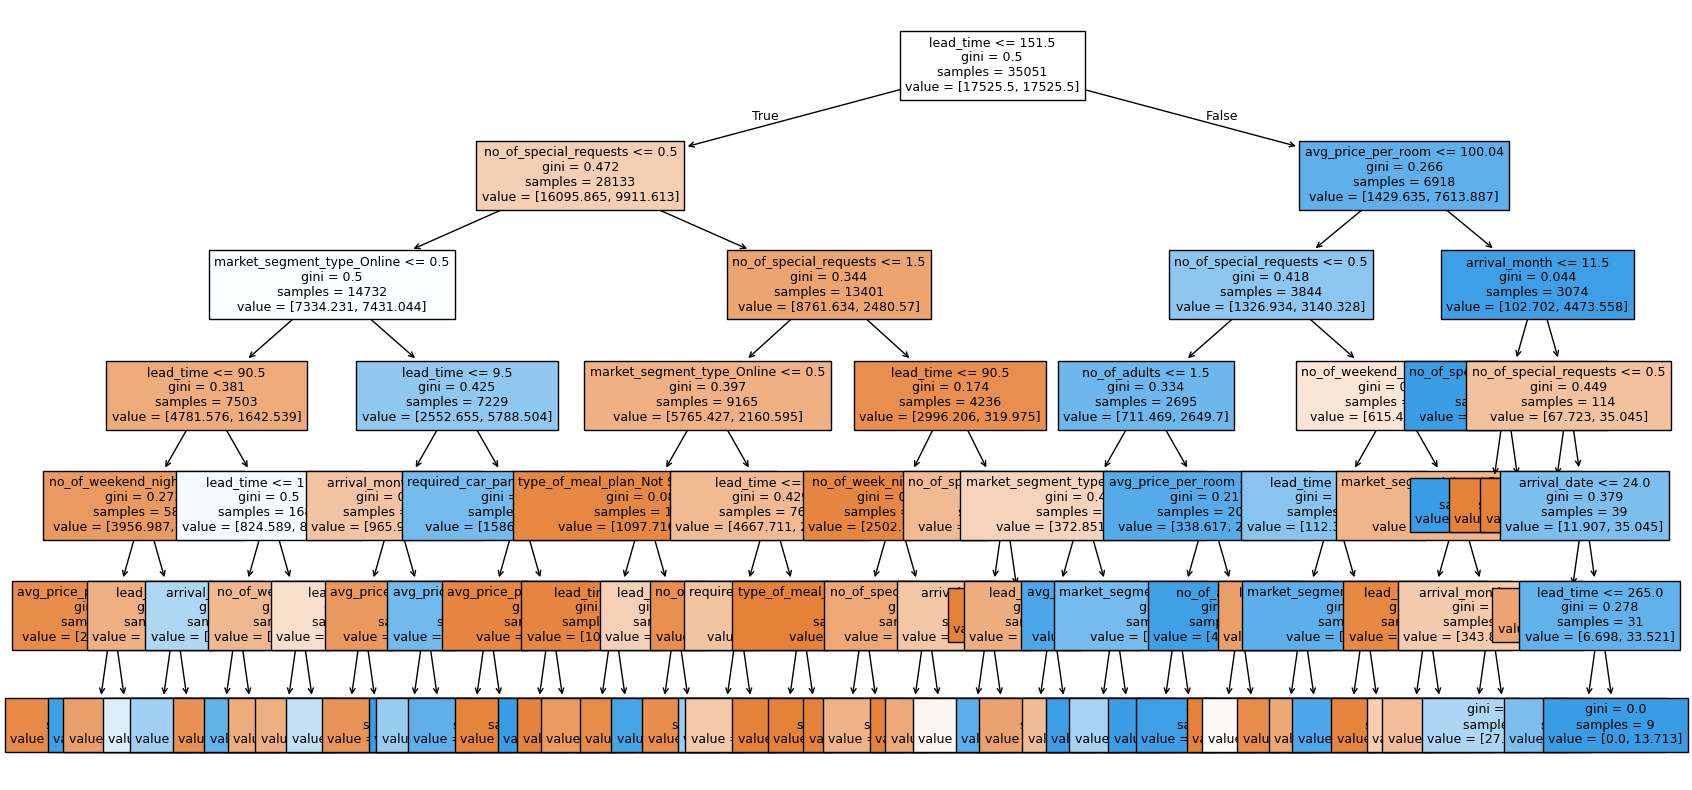

In [ ]:
# Plotting the decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# Adding arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Alternative view of the tree: Text report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- weights: [2467.07, 181.32] class: 0
|   |   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |   |--- weights: [0.74, 35.04] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- weights: [1294.93, 316.93] class: 0
|   |   |   |   |   |--- lead_time >  65.50
|   |   |   |   |   |   |--- weights: [194.24, 236.17] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [350.52, 682.61] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [58.79, 7.62] class: 0
| 

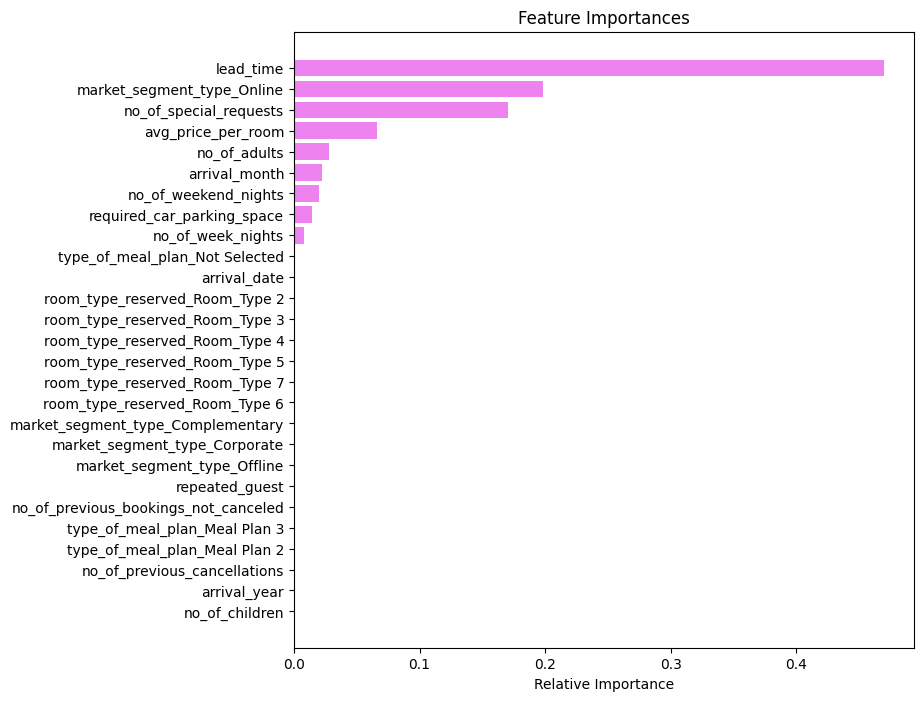

In [ ]:
# Important features to the decision tree (pre-pruning)

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In the **unpruned tree**, feature importance is spread across more variables, including some with very low contributions. While `lead_time` and `avg_price_per_room` are still top predictors, the model also gives non-negligible importance to many other features, which may reflect overfitting.

- In contrast, the **pre-pruned tree**, concentrates importance in a smaller set of features. `lead_time` becomes even more dominant, and features like `market_segment_type_Online`, `no_of_special_requests`, and `avg_price_per_room` follow — while many low-impact features are excluded or assigned near-zero importance.

- This shift suggests that pre-pruning simplifies the tree by **reducing reliance on weaker predictors**, which may help prevent overfitting while retaining the strongest signals for prediction.

#### 7.3.6. Post-pruning: Cost Complexity Pruning

**Cost Complexity Pruning**

- Post-pruning is applied **after** the full tree is grown to simplify the model by trimming back less useful branches.

- Cost Complexity Pruning (also known as weakest link pruning) introduces a penalty for tree complexity to balance model fit and generalization.

- It uses a parameter `α` (alpha) to control the trade-off between tree size and accuracy — higher values of `α` result in simpler trees.

- The goal is to prevent overfitting by keeping only the splits that provide meaningful improvements in prediction.


In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00906
1        0.00000     0.00906
2        0.00000     0.00906
3        0.00000     0.00906
4        0.00000     0.00906
...          ...         ...
2359     0.00880     0.32779
2360     0.00973     0.33751
2361     0.01232     0.34983
2362     0.03443     0.41870
2363     0.08130     0.50000

[2364 rows x 2 columns]

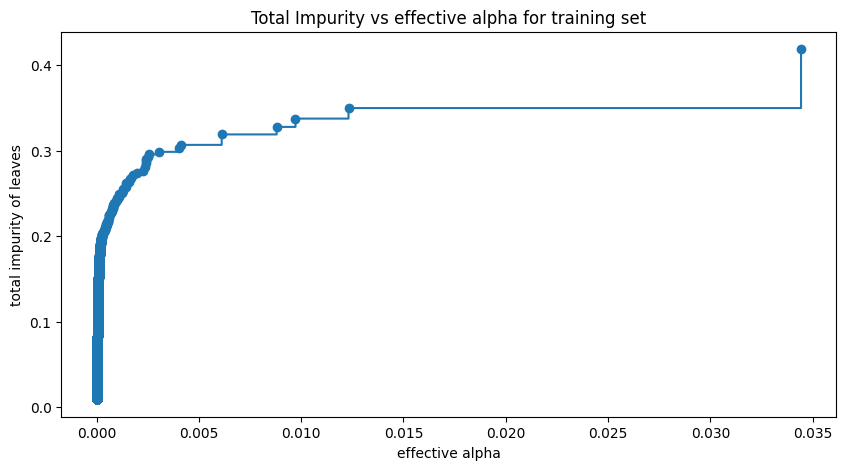

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- As alpha increases, the tree gets pruned more, and we can see impurity going up step by step — this means we're simplifying the tree by removing branches.

- Toward the end, there is a sudden jump in impurity, which tells us the tree is becoming too simple. At that point, it’s likely losing valuable patterns, so we should choose an alpha value before that big spike to keep a good balance between simplicity and performance.

**Next step**

- We will train several decision trees using different values of alpha (`ccp_alphas`), which control how much pruning is applied. Higher alpha values result in simpler trees by trimming more branches.

- The very last alpha in the full list is the most aggressive — it prunes the entire tree down to just a single node, meaning no splits at all. The corresponding model, `clfs[-1]`, is the most simplified version and always makes the same prediction regardless of input.

- In our case, because the full list had 2,364 values and was too heavy to run in Google Colab, we sampled every 10th value to reduce computation time. As a result, the last tree we trained (with `ccp_alpha ≈ 0.00973`) had **9 nodes** — not the fully collapsed tree we would have seen using the complete list.

- But for practical purposes, this sampling still gives us a well-distributed range of pruning levels to evaluate, without overloading the environment or sacrificing much insight.



In [ ]:
# Checking the number of ccp_alphas
print(f"Number of ccp_alphas: {len(ccp_alphas)}")

Number of ccp_alphas: 2364


In [ ]:
# Sampling alpha values to reduce computational load
ccp_alphas_sampled = ccp_alphas[::10]

# Training a list of trees using the sampled alphas
clfs = []
for ccp_alpha in ccp_alphas_sampled:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Printing info about the last tree in the sampled list
print(
    f"Final sampled alpha: {ccp_alphas_sampled[-1]:.6f} | Nodes remaining in last tree: {clfs[-1].tree_.node_count}"
)

# Removing last model if it reduces to a single node
if clfs[-1].tree_.node_count == 1:
    clfs = clfs[:-1]
    ccp_alphas_sampled = ccp_alphas_sampled[:-1]

Final sampled alpha: 0.009726 | Nodes remaining in last tree: 9


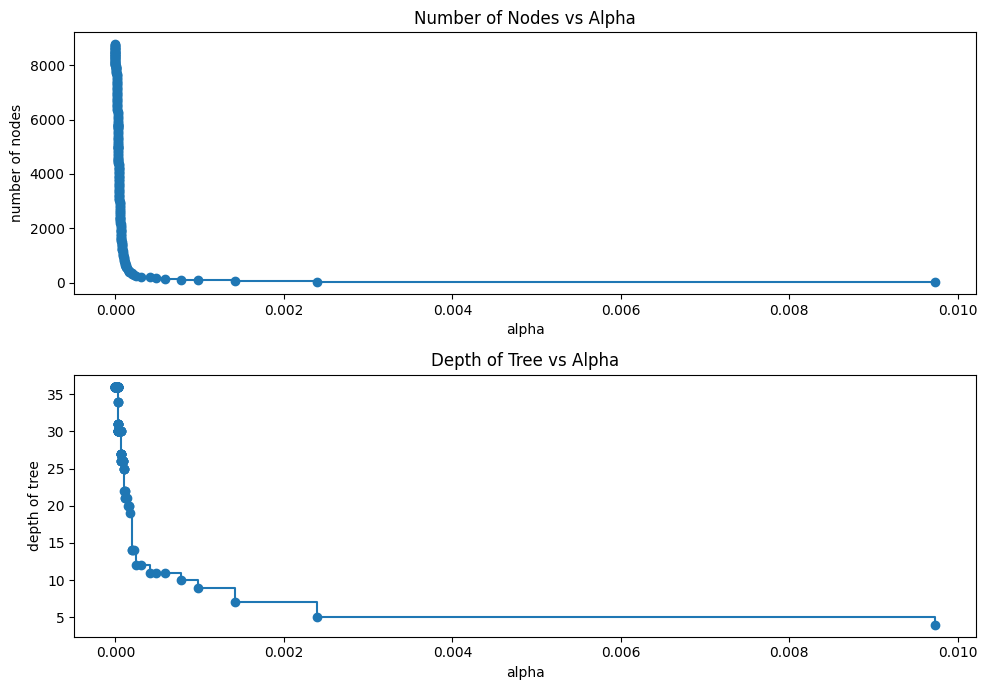

In [ ]:
# Extracting tree complexity metrics
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].plot(ccp_alphas_sampled, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of Nodes vs Alpha")

ax[1].plot(ccp_alphas_sampled, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth of Tree vs Alpha")

fig.tight_layout()
plt.show()


**Observations from Number of Nodes vs Alpha and Depth of Tree vs Alpha**

- When alpha increases slightly from zero, the tree simplifies quickly — both in terms of the number of nodes and depth. This suggests early pruning removes a lot of unnecessary complexity, helping reduce overfitting.

- After around alpha ≈ 0.002, the structure of the tree stabilizes. Further increases in alpha no longer reduce complexity meaningfully, indicating that most of the pruning has already been done.

- The final point on the curve represents a tree that’s been pruned too aggressively — likely leaving just a root or a few nodes. This level of simplicity would likely hurt the model’s ability to make good predictions, so we should not use it.


##### 7.3.6.1. F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

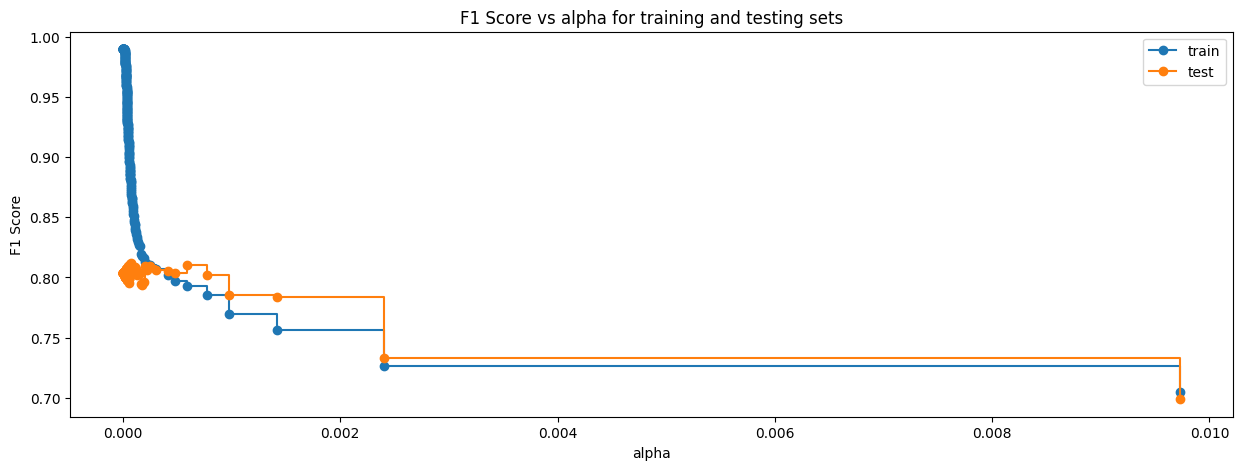

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas_sampled, f1_train, marker="o", label="train", drawstyle="steps-post") # change here ccp_alphas
ax.plot(ccp_alphas_sampled, f1_test, marker="o", label="test", drawstyle="steps-post") # change here
ax.legend()
plt.show()

**Observations from F1 Score vs Alpha Plot**

- The F1 score for the test set reaches its peak at a very low alpha value, near the start of the curve. This suggests that only minimal pruning is needed to achieve optimal generalization.

- As alpha increases beyond this small range, both training and test F1 scores begin to decline, indicating that the tree is starting to lose important splits.

- In particular, alpha values beyond a certain point (around 0.001) lead to noticeable drops in performance, signaling over-pruning.

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(7.880472089862496e-05),
                       class_weight='balanced', random_state=1)


##### 7.3.6.2. Checking performance on training set

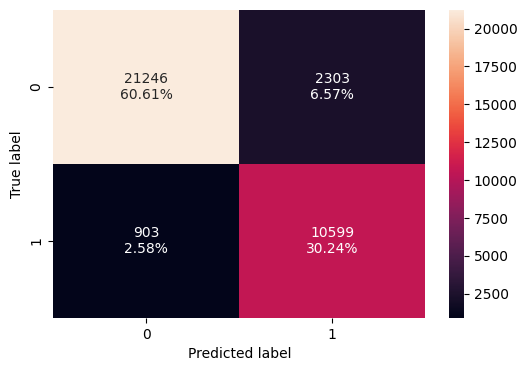

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.90853 0.92149    0.82150 0.86863

##### 7.3.6.3. Checking performance on test set

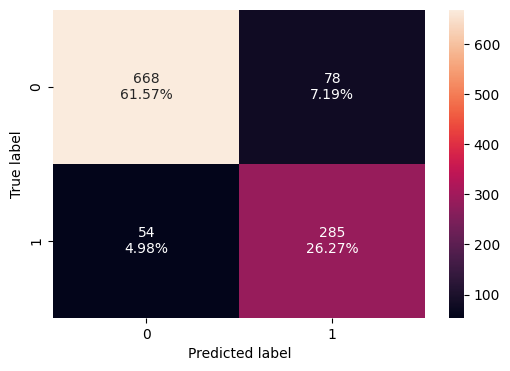

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.87834 0.84071    0.78512 0.81197

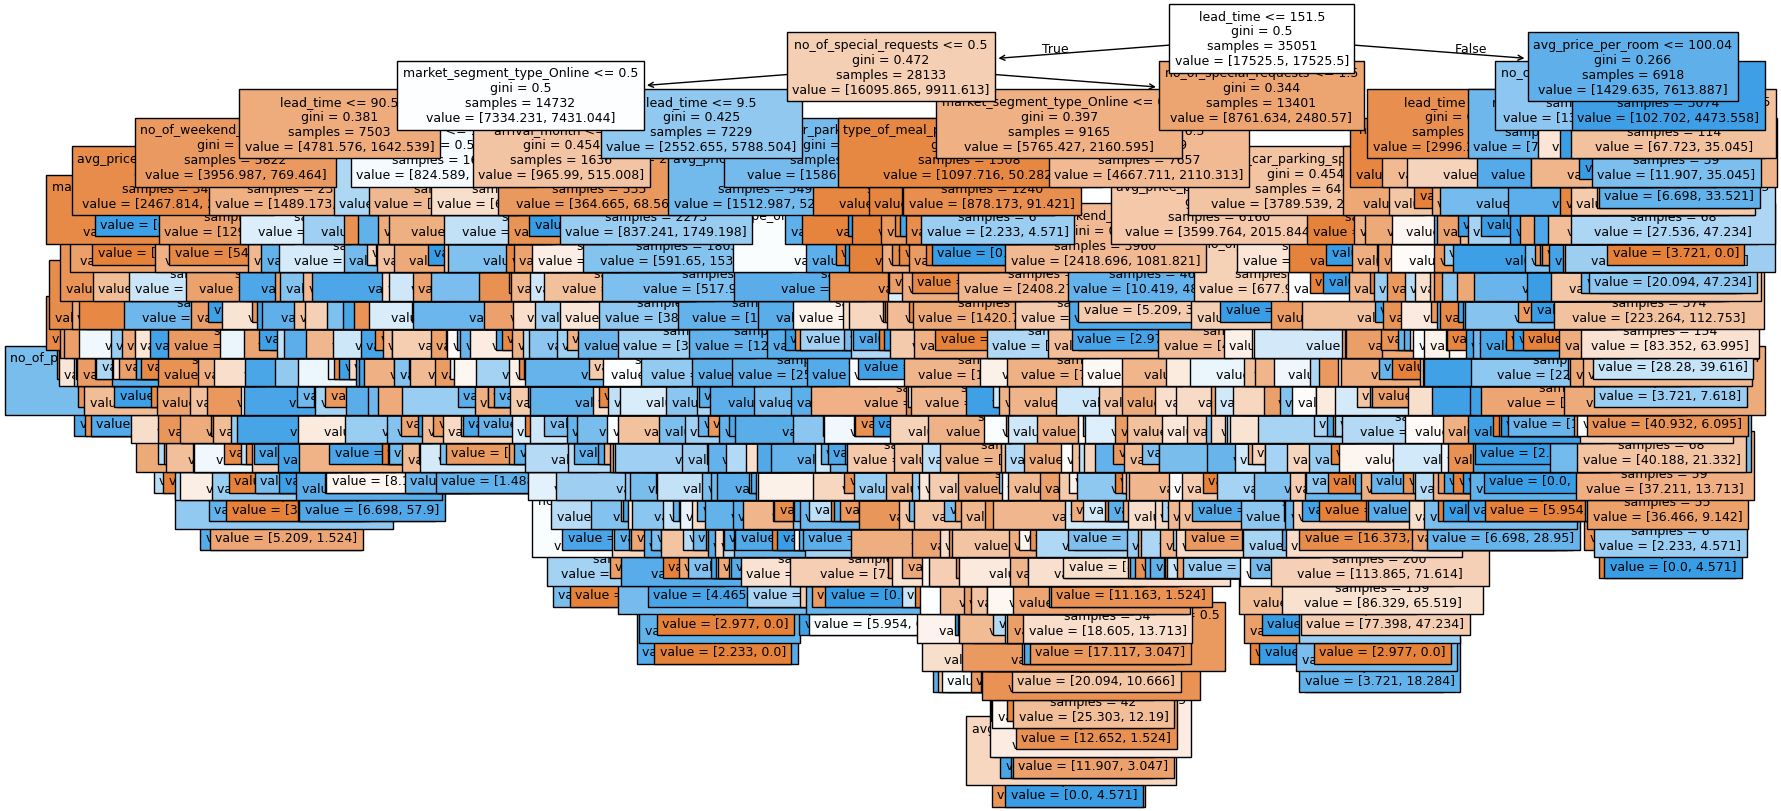

In [ ]:
# Visualizing post-pruned decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Alternative view of the tree: Text report showing the rules of the post-pruned decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [352.01, 22.86] class: 0
|   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 17.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [44.65, 3.05] class: 0
|   |   |   |   |   |   |   |   |   |   |--- arrival_date >  17.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   | 

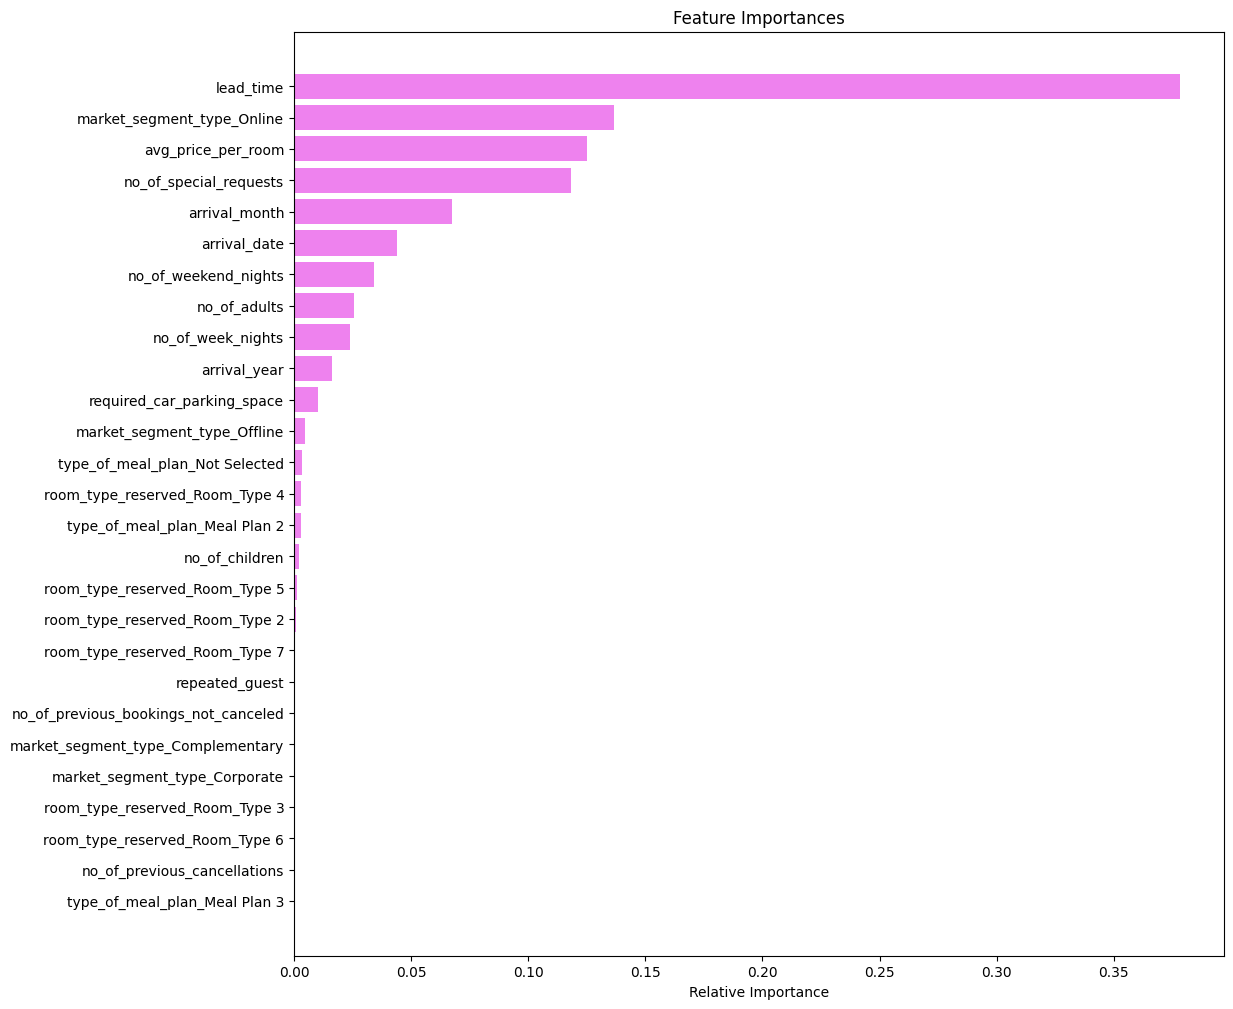

In [ ]:
# Important features to the decision tree (post-pruning)
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Both pre-pruned and post-pruned models rank lead_time, market_segment_type_Online, and no_of_special_requests among the most important predictors of cancellations, so the **top features are consistent**.

- The **post-pruned model** focuses on a smaller set of high-impact variables and drops many of the lower-importance ones (e.g., `no_of_previous_cancellations`, `room_type_reserved_Room_Type_3`, `market_segment_type_Corporate`), meaning it's **more selective**.

- In contrast, the **pre-pruned model includes more variables**, such as different room types and meal plans, some of which have very low relative importance. This suggests a **broader but possibly noisier model**.

#### 7.3.7. Comparing Decision Tree Models

In [ ]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [   # Transposing each performance DataFrame using .T before concatenation
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99381                      0.82996   
Recall                   0.98452                      0.79499   
Precision                0.99657                      0.71740   
F1                       0.99051                      0.75421   

           Decision Tree (Post-Pruning)  
Accuracy                        0.90853  
Recall                          0.92149  
Precision                       0.82150  
F1                              0.86863

In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [  # Transposing each performance DataFrame using .T before concatenation
       decision_tree_perf_test.T,
       decision_tree_tune_perf_test.T,
       decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87005                      0.85069   
Recall                   0.79351                      0.80531   
Precision                0.79118                      0.73984   
F1                       0.79234                      0.77119   

           Decision Tree (Post-Pruning)  
Accuracy                        0.87834  
Recall                          0.84071  
Precision                       0.78512  
F1                              0.81197

**Decision Tree Model Evaluation**

- The **unpruned tree** performs exceptionally well on the training set, with recall at 98.5% and precision at 99.7%. However, test results show a sharp decline (recall: 79.4%, precision: 79.1%, F1: 79.2%), indicating **severe overfitting**. While it captures nearly all cancellations during training, it fails to generalize to unseen data. For INN Hotels, this can lead to missed cancellations (false negatives) and unnecessary interventions (false positives), both of which carry operational and reputational risks.

- The **pre-pruned model** shows **more stable performance across training and test sets with 1-3% variation**. Test recall is 80.5%, precision is 73.9%, and F1 is 77.1%, which reflects moderate ability to detect cancellations while limiting false alerts. However, this model may slightly underperform compared to the post-pruned model in situations where early detection of cancellations is a business priority.

- The **post-pruned model** stands out with the **highest recall on the test set** (84.1%), making it the **most effective at identifying true cancellations**. Precision remains strong at 78.5%, and its F1 score of 81.2% on test data confirms a well-balanced performance. Though there is **some overfitting**, the test accuracy of 87.8% and higher F1 of 81.2% suggest this model generalizes better than the others while still flagging most cancellations correctly.


## 8. Executive Summary

### 8.1. Logistic Regression Model Summary

**Threshold = 0.42**

- Offers a balanced performance, with both precision and recall around 70% on the test set.
- Consistent train-test results suggest strong generalization and minimal overfitting.
- As a linear model, it is easy to interpret, making it useful when understanding key cancellation drivers is important.
- Slightly underperforms in recall compared to tree models, so it may miss some cancellations.

**Threshold = 0.29**

- Prioritizes minimizing false negatives (recall: 81% on the test set), helping the hotel act early on potential cancellations.
-However, precision drops (~62%), leading to more false positives, which could trigger unnecessary interventions.
- Best used when capturing cancellations is more critical than avoiding false alerts.




### 8.2. Decision Tree Model Summary

**Post-Pruned Tree**

- The most effective model for detecting cancellations, with test recall at 84.1% and F1 score of 81.2%.
- Ideal when the goal is to maximize detection of cancellations.
- Shows mild overfitting (train vs. test drop in precision and recall), suggesting the need for monitoring in production.
- Captures nonlinear interactions, but may be less transparent than logistic regression.

**Pre-Pruned Tree**

- Delivers simpler structure and more stable performance (test recall: 80.5%, precision: 73.9%) with better train-test alignment.
- A more conservative and generalizable model, but slightly less powerful at detecting cancellations.
- Good choice when avoiding overfitting, ensuring deployment robustness are key concerns, and have less computational resources.


### 8.3. Conclusion



- The **objectives** of this study were to:
  1. identify the key drivers of booking cancellations,
  2. develop a predictive model to anticipate cancellations in advance,
  3. and support INN Hotels in designing data-driven cancellation and refund strategies.

- Exploratory analysis and modeling revealed that **lead time, online bookings, and lack of special requests** were among the most influential factors associated with higher cancellation rates.

- Several machine learning models were evaluated, with the **post-pruned decision tree** emerging as the most effective at identifying potential cancellations, achieving a recall of 84.1% and a strong F1 score of 81.2% on the test set. It combines **strong cancellation detection** with **manageable false positives**, helping the hotel take timely action without unnecessary disruptions. However, the slight overfitting still visible in the training–test gap underscores the need to **continuously monitor and recalibrate** the model as customer behavior or market conditions evolve.

- Logistic regression models also provided consistent and interpretable results, particularly useful for **stakeholder communication**.


### 8.4. Actionable Insights for INN Hotels







- **Cancellations are more likely** for bookings with long lead times and made through **online booking channels**, suggesting these segments require proactive engagement or flexible overbooking policies.

- **Guests making special requests are less likely to cancel**. Encourage such behaviors by promoting personalized service options during booking.

- Repeat guests are rare but valuable. Most bookings come from first-time guests, revealing a growth opportunity in building loyalty. Developing **rebooking incentives or a basic loyalty program** may help reduce cancellations and increase retention.

- Higher room prices and no-shows from online channels suggest a need for **tighter pricing policies or stricter cancellation rules for long-lead, high-value bookings**.

- All models reflect a trade-off between **recall (minimizing missed cancellations)** and **precision (avoiding false alerts)**, so the hotel manager should pick the model that aligns business priorities.


### 8.5. Recommendations for INN Hotels

- **If early and reliable detection is the top priority**, the post-pruned decision tree is the most effective choice.

- **If model interpretability and operational transparency are more important**,  the logistic regression with a 0.29 threshold is a strong, reliable alternative.

- **If a more balanced performance is desired for long-term use**, especially in **environments with limited computational resources**, the pre-pruned decision tree or logistic regression with a 0.42 threshold are suitable options. These models offer consistent results while remaining efficient and easier to maintain.

- Incorporate model predictions into revenue and guest management systems, such as flagging high-risk bookings for follow-ups or adapting overbooking strategies.

- Use logistic regression models in dashboards and reporting tools where explainability for stakeholders is important.

- **Periodically retrain and validate models** to keep them aligned with evolving guest behavior. This is especially critical for the post-pruned decision tree which shows mild overfitting to the training data set.

- Combine model predictions with guest behavioral data (e.g., booking history, lead time, special requests) for more effective segmentation and customer targeting.

### 8.6. Limitations of the Models

- There is a **trade-off between false positives and false negatives**. Models that detect more cancellations (high recall) tend to raise more false alarms (lower precision) which also has some negative aftermath for the hotel, such as overbooking and customer dissatisfactioon.

- Although the post-pruned decision tree minimizes the false negatives the most, the **model mildly overfits** the training data as seen from the drop in performance from training to test sets. This implies that this model is less effective in generalizing over unseen (real-world) data.

- **Behavioral variables** (e.g., guest sentiment, payment method, booking channel details), which could enhance predictions, are not included in the model.

- **New policies or or trends** may reduce model performance over time, since the model was trained on data from 2017 to 2018. Similarly, cancellation patterns may change over time (e.g., during holiday seasons or post-pandemic), requiring ongoing model maintenance.

- **Odds interpretation** in logistic regression may be **misleading without context** — a 200% increase in odds does not mean 200% more cancellations.
